---
Predicting Energy Consumption
---

## Introduction:

### Task

This report aims to `predict energy consumption` in a `low-energy residential building` using a dataset comprising over 19,000 records, with measurements taken every 10 minutes. The dataset encompasses internal temperature, humidity, and external weather data. Our goal is to identify significant predictors for energy consumption and construct robust regression models for accurate prediction.


### Literature Survey

Drawing insights from `two relevant papers` on energy prediction, we will utilize `Random Forest` and `Long Short-Term Memory (LSTM) models` for our analysis. These models were selected based on their documented success in prior research:

- **Paper 1**: Explored various regression models, including linear regression, Support Vector Machines (SVM), `Random Forest (RF)`, and Gradient Boosting (GBM), for energy use prediction. Feature selection was conducted using the Boruta algorithm, while Recursive Feature Elimination (RFE) aided in determining the optimal number of variables.
- `Paper 1:` [Link](https://www.sciencedirect.com/science/article/abs/pii/S0378778816308970?via%3Dihub)

- **Paper 2**: Focused on machine learning models such as SVM, K Nearest Neighbor (KNN), RF, Extreme Random Forest (ERF), and `LSTM`. The study utilized the Pearson correlation coefficient to identify significant features and evaluated model performance using metrics like RMSE and R-squared.
- `Paper 2:` [Link](https://www.researchgate.net/publication/339680663_Prediction_model_of_household_appliance_energy_consumption_based_on_machine_learning)

Our approach integrates insights from these studies, emphasizing the efficacy of Random Forest and LSTM models for energy prediction tasks. The `evaluation framework` will encompass `key performance measures` and `cross-validation techniques` to ensure the robustness of our models. Through these methodologies, we aim to develop models that not only achieve high accuracy but also offer reliable predictions for energy use in residential buildings.





### Methodology:

1. **Exploratory Data Analysis (EDA):** We began by thoroughly exploring the dataset to understand its characteristics. This involved examining data distributions, addressing missing values, and visualizing variable relationships using `time series plot, histograms, scatter plots, and correlation matrices`.


2. **Data Preprocessing:** After EDA, we preprocessed the data to ensure its quality and suitability for modeling. Tasks included handling missing values, encoding categorical variables, `scaling numerical features`, and `partitioning the dataset into training and testing subsets`.


3. **Feature Engineering:** To enrich the dataset and `capture additional information`, we engineered new features from existing ones. This involved `creating time-based features`, `transforming variables`, and leveraging domain knowledge for feature extraction.


4. **Model Selection:** Based on prior research insights and the problem's nature, we selected `Random Forest` and `LSTM models`. These models excel in handling `structured time-series data` and capturing intricate relationships.


5. **Model Training and Evaluation:** The chosen models were trained on the training data and evaluated using appropriate metrics like `R-squared, mean squared error (MSE), root mean squared error (RMSE), and mean absolute error (MAE)`. Cross-validation techniques ensured model robustness.


6. **Hyperparameter Tuning:** We fine-tuned model hyperparameters to enhance performance, employing `grid search` and `random search` techniques to identify optimal hyperparameter configurations.


7. **Model Interpretation:** Finally, we interpreted the trained models to discern factors influencing energy consumption predictions. Feature importance analysis and visualizations elucidated key variables impacting energy usage patterns. 



### Loading Necessary Libraries

In [3]:
import warnings

# Suppressing FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier  # Random Forest for feature importance
from boruta import BorutaPy  # Boruta for feature selection
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



In [4]:
# Reading the UCI_data and storing it in dataframe called df
#df = pd.read_csv('/Users/bp/Documents/Semester_1/ML/A2/dataset/UCI-electricity/UCI_data.csv')
df = pd.read_csv('C:/Users/arvin/OneDrive/Documents/Study/Data_Science_Sem3/Computational_Machine_Learning/Assignment_2/UCI_data.csv')


In [5]:
# printing the first five rows using head() to see if the data is loaded properly
df.head()

date         T1       RH_1         T2       RH_2         T3  \
0  2016-04-19 20:30:00  22.200000  39.500000  20.566667  37.656667  22.230000   
1  2016-03-05 04:40:00  20.356667  37.126667  17.566667  40.230000  20.890000   
2  2016-03-14 12:40:00  20.926667  38.790000  21.100000  35.526667  21.600000   
3  2016-01-22 15:30:00  18.290000  38.900000  17.290000  39.260000  18.390000   
4  2016-02-10 00:40:00  22.290000  42.333333  21.600000  40.433333  22.666667   

        RH_3         T4       RH_4         T5  ...   RH_9  T_out  Press_mm_hg  \
0  37.030000  22.318571  36.610000  20.633333  ...  33.90   9.70   766.100000   
1  37.663333  18.700000  36.260000  18.463333  ...  41.09   0.30   740.333333   
2  36.290000  21.000000  34.826667  18.100000  ...  38.76   4.40   768.466667   
3  39.326667  16.100000  38.790000  16.100000  ...  39.20   3.35   760.600000   
4  43.363333  19.100000  40.900000  19.290000  ...  43.73   3.20   738.900000   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  \
0    65.5   3.500000   40.000000   3.350000  24.061869  24.061869   
1    99.0   1.000000   41.333333   0.100000   4.622052   4.622052   
2    72.0   6.000000   22.666667  -0.266667   5.635898   5.635898   
3    82.0   5.500000   41.000000   0.500000  49.216445  49.216445   
4    88.0   7.333333   56.000000   1.400000  47.617579  47.617579   

   TARGET_energy  
0             60  
1             50  
2             80  
3             40  
4             60  

[5 rows x 28 columns]

In [6]:
# Checking the shape
df.shape

(19735, 28)

- It has 19736 rows with 28 columns

In [7]:
# printing the column names
df.columns

Index(['date', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'TARGET_energy'],
      dtype='object')

## Metadata

1. date, time year-month-day hour:minute:second 
2. T1, Temperature in kitchen area, in 
3. RH_1, Humidity in kitchen area, in % 
4.  T2, Temperature in living room area in Celsius 
5. RH_2, Humidity in living room area, in % 
6. T3, Temperature in laundry room area 
7. RH_3, Humidity in laundry room area, in % 
8. T4, Temperature in office room, in Celsius 
9. RH_4, Humidity in office room, in % 
10. T5, Temperature in bathroom, in Celsius 
11. RH_5, Humidity in bathroom, in % 
12. T6, Temperature outside the building (north side), in Celsius 
13. RH_6, Humidity outside the building (north side), in % 
14. T7, Temperature in ironing room , in Celsius 
15. RH_7, Humidity in ironing room, in % 
16. T8, Temperature in teenager room 2, in Celsius 
17. RH_8, Humidity in teenager room 2, in % 
18. T9, Temperature in parents room, in Celsius 
19. RH_9, Humidity in parents room, in % 
20. To, Temperature outside (from Chievres weather station), in Celsius 
21. Pressure (from Chievres weather station), in mm Hg 
22. RH_out, Humidity outside (from Chievres weather station), in % 
23. Wind speed (from Chievres weather station), in m/s 
24. Visibility (from Chievres weather station), in km 
25. Tdewpoint (from Chievres weather station), 'c2'b0C 
26. rv1, Random variable 1, nondimensional 
27. rv2, Random variable 2, nondimensional 
28. TARGET_Energy, energy use of Appliances and light fixtures in the house in Wh 

In [8]:
# Checking if any null exist
df.isnull().sum()

date             0
T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
TARGET_energy    0
dtype: int64

- As we can see there are no null values present

In [9]:
df.dtypes

date              object
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
TARGET_energy      int64
dtype: object

- As we can see the all the Temperature and Relative humidity datas are in float64 format and Target_energy is in int64 format 

In [10]:
type(df.iloc[1]['date'])

str

- As we can see date is in string format. We can downcast these types to smaller int, float size, so the processing speed increases.

In [11]:
#
df.describe()

T1          RH_1            T2          RH_2            T3  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     40.259739     20.341219     40.420420     22.267611   
std        1.606066      3.979299      2.192974      4.069813      2.006111   
min       16.790000     27.023333     16.100000     20.463333     17.200000   
25%       20.760000     37.333333     18.790000     37.900000     20.790000   
50%       21.600000     39.656667     20.000000     40.500000     22.100000   
75%       22.600000     43.066667     21.500000     43.260000     23.290000   
max       26.260000     63.360000     29.856667     56.026667     29.236000   

               RH_3            T4          RH_4            T5          RH_5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      39.242500     20.855335     39.026904     19.592106     50.949283   
std        3.254576      2.042884      4.341321      1.844623      9.022034   
min       28.766667     15.100000     27.660000     15.330000     29.815000   
25%       36.900000     19.530000     35.530000     18.277500     45.400000   
50%       38.530000     20.666667     38.400000     19.390000     49.090000   
75%       41.760000     22.100000     42.156667     20.619643     53.663333   
max       50.163333     26.200000     51.090000     25.795000     96.321667   

       ...          RH_9         T_out   Press_mm_hg        RH_out  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     41.552401      7.411665    755.522602     79.750418   
std    ...      4.151497      5.317409      7.399441     14.901088   
min    ...     29.166667     -5.000000    729.300000     24.000000   
25%    ...     38.500000      3.666667    750.933333     70.333333   
50%    ...     40.900000      6.916667    756.100000     83.666667   
75%    ...     44.338095     10.408333    760.933333     91.666667   
max    ...     53.326667     26.100000    772.300000    100.000000   

          Windspeed    Visibility     Tdewpoint           rv1           rv2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       4.039752     38.330834      3.760707     24.988033     24.988033   
std        2.451221     11.794719      4.194648     14.496634     14.496634   
min        0.000000      1.000000     -6.600000      0.005322      0.005322   
25%        2.000000     29.000000      0.900000     12.497889     12.497889   
50%        3.666667     40.000000      3.433333     24.897653     24.897653   
75%        5.500000     40.000000      6.566667     37.583769     37.583769   
max       14.000000     66.000000     15.500000     49.996530     49.996530   

       TARGET_energy  
count   19735.000000  
mean      101.496833  
std       104.380829  
min        10.000000  
25%        50.000000  
50%        60.000000  
75%       100.000000  
max      1110.000000  

[8 rows x 27 columns]

## Key Observations

**Temperature Variation:**
- The temperature features (`T1`, `T2`, ..., `T5`) show moderate variability, with standard deviations ranging from about 1.6 to 2.2 degrees. This indicates some fluctuations, possibly due to seasonal changes or indoor environmental control.

**Humidity Spread:**
- Relative humidity (`RH_1`, `RH_2`, ..., `RH_9`) varies considerably, with standard deviations from 3.9 to 9. The highest variation is in `RH_9`, suggesting this feature might require additional analysis or normalization.

**Stable Atmospheric Pressure:**
- `Press_mm_hg` (atmospheric pressure) has a narrow range (729–772 mm Hg) and low standard deviation, indicating stable atmospheric conditions.

**Energy Consumption:**
- `TARGET_energy`, representing energy usage, shows a significant range from 10 Wh to 1110 Wh, with a high standard deviation (104 Wh). This wide spread might suggest different levels of activity, seasonality, or outliers.

**Potential Outliers:**
- The broad range in features like energy consumption and humidity may indicate outliers or anomalies. Identifying and handling these is crucial for accurate modeling.

**Windspeed and Visibility:**
- `Windspeed` and `Visibility` display variability, with standard deviations of 2.5 and 11.8, respectively. This suggests fluctuations due to changing weather conditions.


In [12]:
## Checking column types of each columns

df.dtypes

date              object
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
TARGET_energy      int64
dtype: object

### Feature Engineering

In [13]:
df['date'] = pd.to_datetime(df['date'])
# set datetime as index
sorted_df = df.sort_values(by='date')
sorted_df = sorted_df.reset_index(drop=True)
# arrange the dataframe in ascending order by date time
sorted_df.index = pd.to_datetime(sorted_df['date'], format='%d-%m-%Y %H:%M:%S')

In [14]:
sorted_df['seconds'] = sorted_df.index.map(pd.Timestamp.timestamp)

In [15]:
day = 24*60*60

sorted_df['day_sin'] = np.sin(sorted_df['seconds'] * (2 * np.pi / day))
sorted_df['day_cos'] = np.cos(sorted_df['seconds'] * (2 * np.pi / day))
sorted_df = sorted_df.drop('seconds', axis=1)

- We're converting the time of day into `sine` and `cosine features` to capture its `cyclical nature`. This helps the model understand the `periodic patterns`, like `daily fluctuations in energy use`. By transforming time into smooth, continuous representations, the model can better interpret temporal data and identify recurring trends accurately.

In [16]:
data = sorted_df.copy()

- Primilarly all the objects are in float64 type and some are in int64 type and date is an object.

### Performing Downcast to save memory


In [17]:
# Converting data to np objects for faster tranformation

import numpy as np
import pandas as pd

# Function to downcast DataFrame data types to save memory
def downcast_memory_usage(data):
    # Iterate over each column and its data type
    for column_name, data_type in data.dtypes.items():
        # Downcast integer columns
        if data_type.kind in ['i', 'u']:  # 'i' for signed, 'u' for unsigned
            # Determine the min and max of the column
            min_val = data[column_name].min()
            max_val = data[column_name].max()

            # Decide the smallest possible integer type
            if min_val >= np.iinfo(np.int8).min and max_val <= np.iinfo(np.int8).max:
                data[column_name] = data[column_name].astype(np.int8)
            elif min_val >= np.iinfo(np.int16).min and max_val <= np.iinfo(np.int16).max:
                data[column_name] = data[column_name].astype(np.int16)
            elif min_val >= np.iinfo(np.int32).min and max_val <= np.iinfo(np.int32).max:
                data[column_name] = data[column_name].astype(np.int32)
            else:
                data[column_name] = data[column_name].astype(np.int64)

        # Downcast float columns
        elif data_type.kind == 'f':  # 'f' for floating-point
            # Get the min and max values for float downcasting
            min_val = data[column_name].min()
            max_val = data[column_name].max()

            # Determine the smallest possible floating-point type
            if min_val >= np.finfo(np.float16).min and max_val <= np.finfo(np.float16).max:
                data[column_name] = data[column_name].astype(np.float16)
            elif min_val >= np.finfo(np.float32).min and max_val <= np.finfo(np.float32).max:
                data[column_name] = data[column_name].astype(np.float32)
            else:
                data[column_name] = data[column_name].astype(np.float64)

        # Convert object type to datetime if it looks like a date
        elif data_type == 'O':  # 'O' stands for object (usually strings)
            try:
                # Attempt to convert to datetime
                data[column_name] = pd.to_datetime(data[column_name], format='%d-%m-%Y %H:%M')
            except ValueError:
                pass  # If conversion fails, keep it as an object

    return data

# Apply the downcast function to the DataFrame
df = downcast_memory_usage(data)

# Data has been downcasted 

This code above performs the following operations

- Downcasts integer and float data types to the smallest possible data type.
- Converts object (string) columns to datetime where applicable.
- Safely handles errors during datetime conversion attempts.

In [18]:
df.dtypes

date             datetime64[ns]
T1                      float16
RH_1                    float16
T2                      float16
RH_2                    float16
T3                      float16
RH_3                    float16
T4                      float16
RH_4                    float16
T5                      float16
RH_5                    float16
T6                      float16
RH_6                    float16
T7                      float16
RH_7                    float16
T8                      float16
RH_8                    float16
T9                      float16
RH_9                    float16
T_out                   float16
Press_mm_hg             float16
RH_out                  float16
Windspeed               float16
Visibility              float16
Tdewpoint               float16
rv1                     float16
rv2                     float16
TARGET_energy             int16
day_sin                 float16
day_cos                 float16
dtype: object

- As we can see the data has been downcasted to a smaller data type size


In [19]:
# Performing EDA on the data

# Create a new copy of the DataFrame for exploratory analysis
data_copy = df.copy()



## Exploratory Data Analysis(EDA)


In [20]:
# Check the unique dates in the DataFrame
unique_dates = data_copy.index.sort_values().unique()  # Get unique sorted dates

print("Unique dates in the DataFrame:")
print(unique_dates)  # Display all unique dates in the data

Unique dates in the DataFrame:
DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
               '2016-01-11 17:20:00', '2016-01-11 17:30:00',
               '2016-01-11 17:40:00', '2016-01-11 17:50:00',
               '2016-01-11 18:00:00', '2016-01-11 18:10:00',
               '2016-01-11 18:20:00', '2016-01-11 18:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=19735, freq=None)


- The data spans from January to May 2016, with consistent 10-minute intervals between each data point.
- This regular spacing creates a reliable time-series structure, useful for analyzing trends and patterns in energy consumption.
- With data collected at this interval, we can examine fluctuations within the day, identify peak usage times, and detect broader trends from January to May.
- The consistent data collection over several months provides a solid foundation for predictive modeling and time-series analysis, allowing for more accurate forecasts and insights.


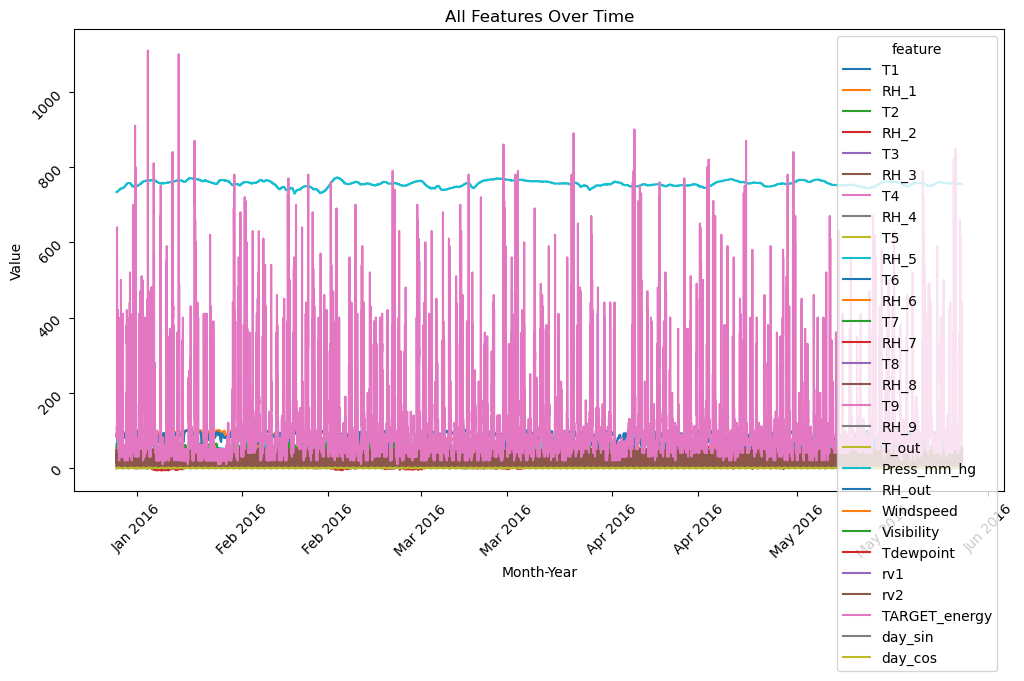

In [21]:


# Reshape the DataFrame to a long format
long_edadf = data_copy.melt(id_vars='date', var_name='feature', value_name='value')

# Creating a Seaborn line plot
plt.figure(figsize=(12, 6))  # Set plot size

sns.lineplot(
    data=long_edadf,
    x='date',
    y='value',
    hue='feature',
    palette='tab10'
)

# Set the major formatter to show only month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Show month and year

# Set the major locator to ensure fewer ticks, avoiding clutter
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto choose tick intervals

# Title, x-axis label, and y-axis label
plt.title("All Features Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Value")

# Rotate x-axis labels for better readability
plt.gca().tick_params( rotation=45)  # Rotate for better visibility

# Show the plot
plt.show()  # Display the plot


### Interpretation from All features over time graph

- **Energy Usage Trends**: The graph shows clear peaks and valleys in appliance usage, indicating fluctuations in activity levels. The peaks could represent busy daytime periods, while the valleys might correspond to quieter nighttime hours.

- **Data Gaps**: The graph highlights significant breaks in appliance usage at specific times, like the end of January and early April. These interruptions may be due to data collection issues or other anomalies that need further investigation.



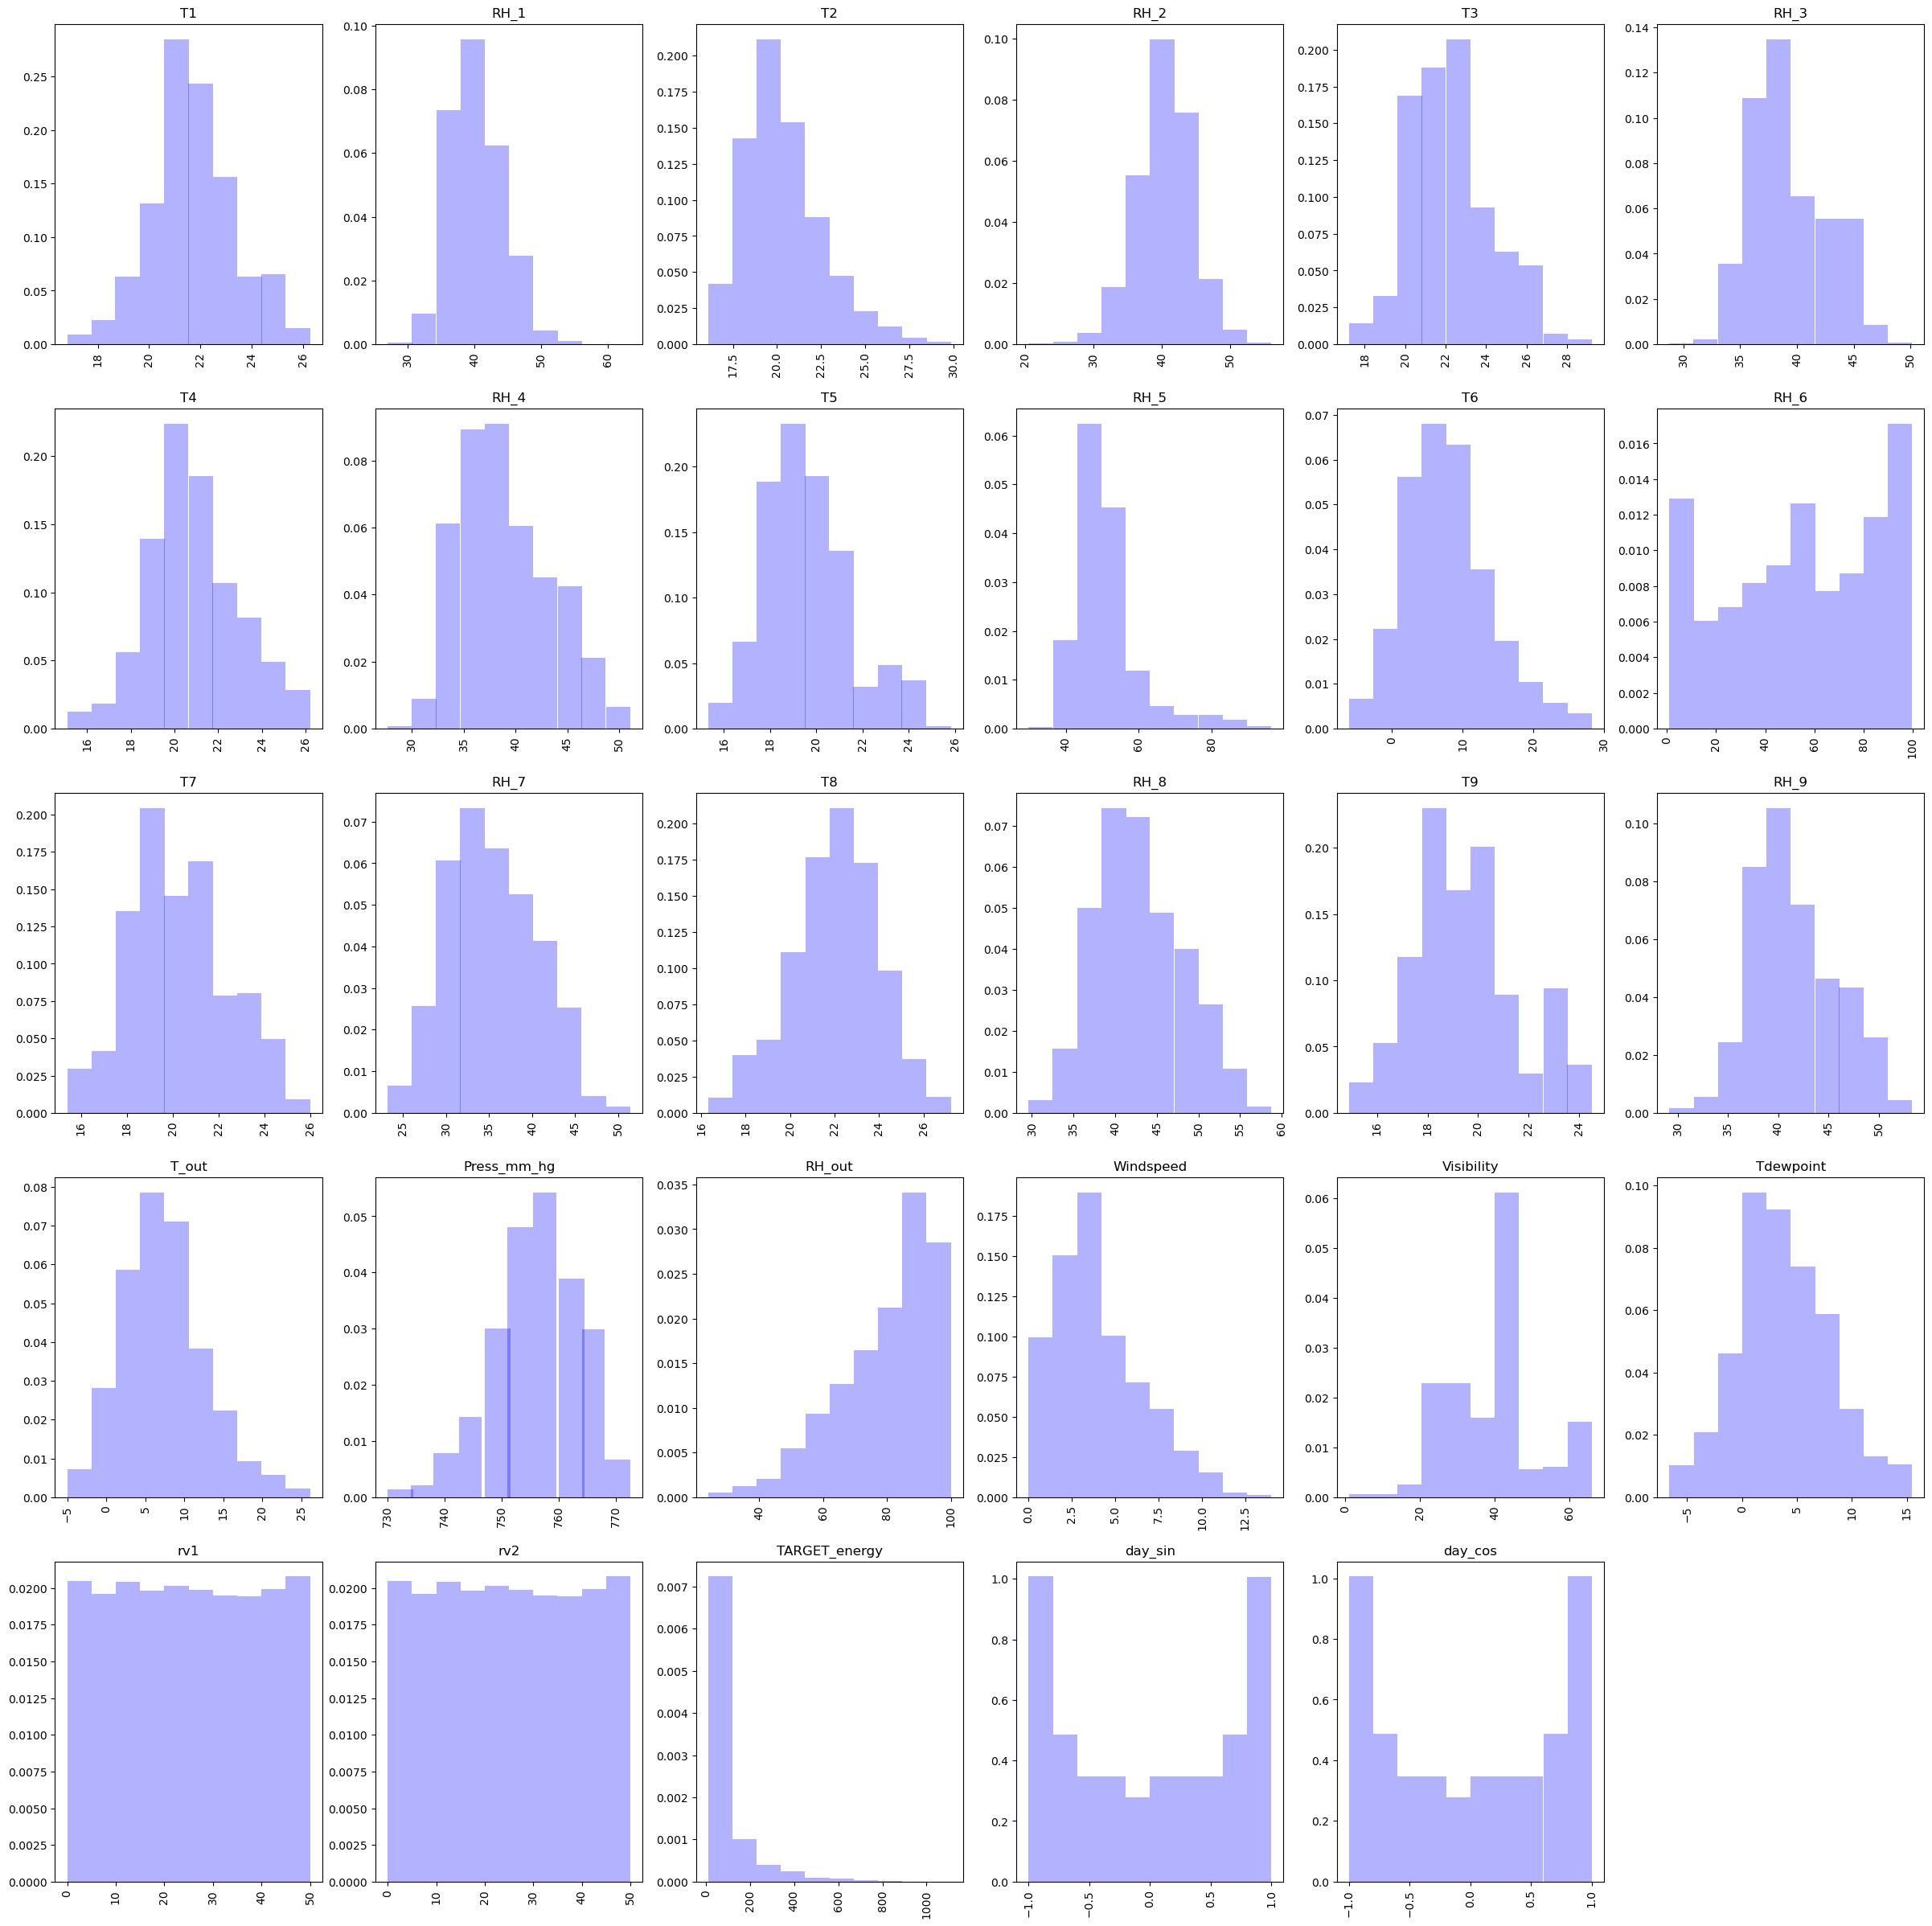

In [22]:
box_df = df.drop(columns=['date'])
plt.figure(figsize=(30,30))
for i, col in enumerate(box_df.columns):
    plt.subplot(5,6,i+1)
    plt.hist(box_df[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

- As we can see `T2, T3, RH6, Windspeed, T6` is right skewed
- And features like `RH_out, Press_mm_hg` are left skewed
- The histogram shows varying scales across features which will be resolved after feature scaling

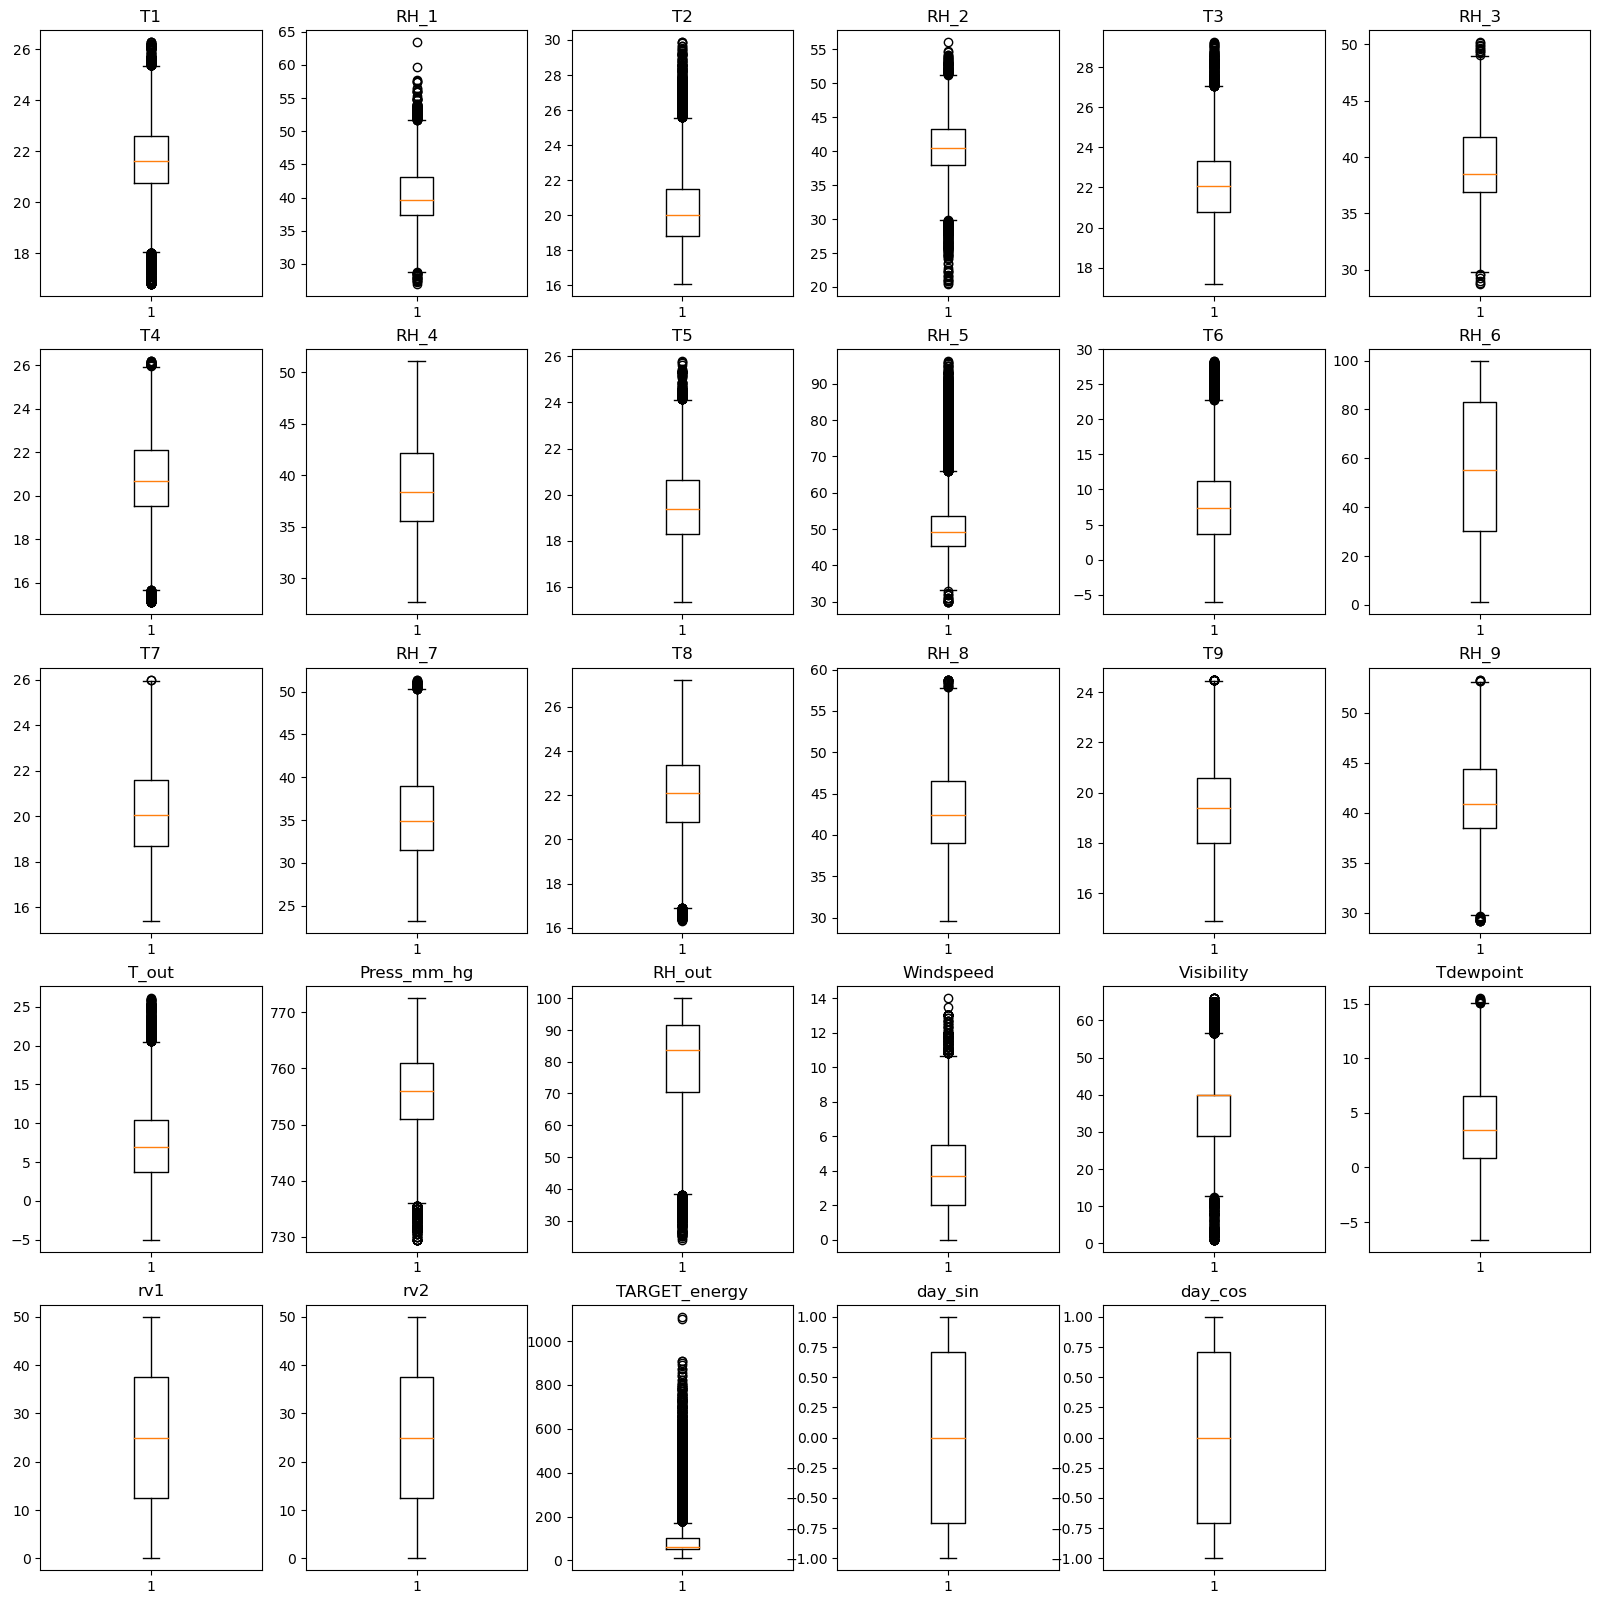

In [23]:
plt.figure(figsize=(20,20))
for i, col in enumerate(box_df.columns):
    plt.subplot(5,6,i+1)
    plt.boxplot(box_df[col])
    plt.title(col)

- We can see outliers present in features `T1, RH1, T2, RH2, T3, Rh5, T6, T_out, RH_out, Windspeed, Visibility, and Target_energy`.

### Target_energy vs Temperature features(T1,T2..., T_out)

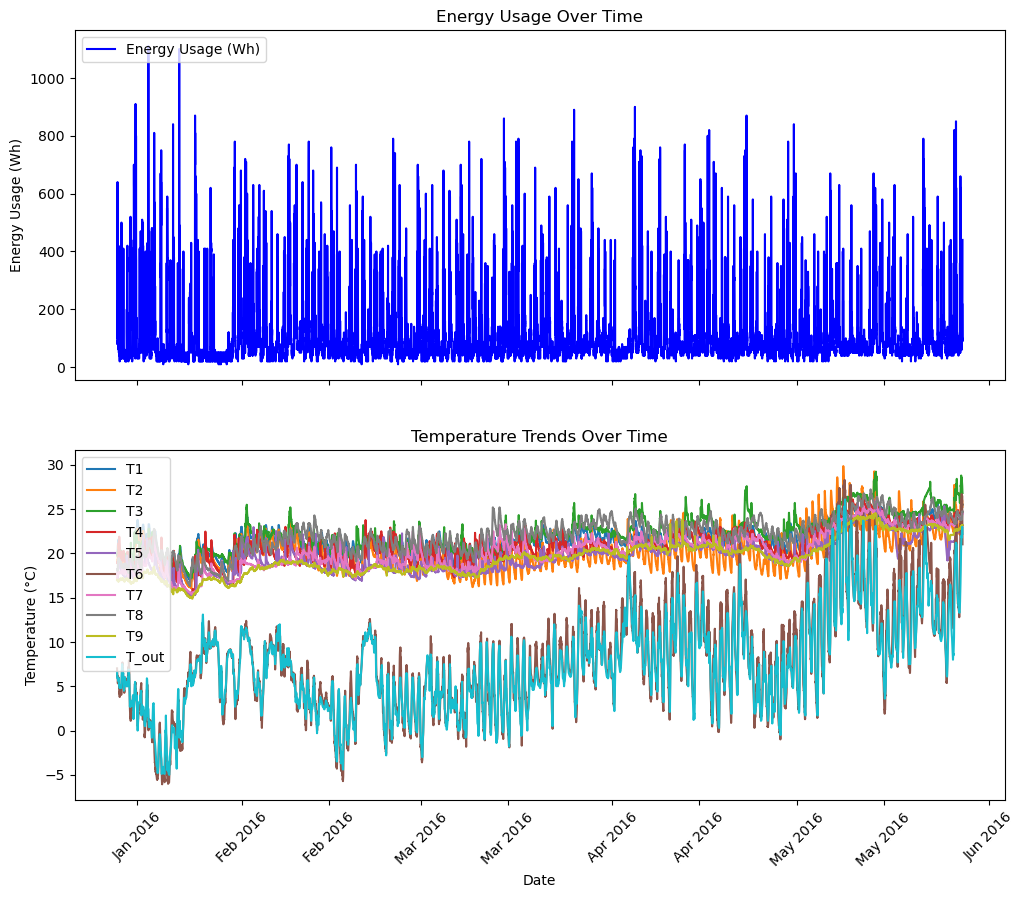

In [24]:
# Defining the DataFrame to use
data_subset = data_copy 

# Creating subplots with two separate graphs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)  # 2 rows, 1 column

# Plot energy usage on the first subplot
sns.lineplot(
    data=data_subset,
    x='date',
    y='TARGET_energy',  # Plot energy usage
    ax=ax1,  # Specify the first subplot
    color='blue',  # Line color
    label='Energy Usage (Wh)',  # Label for legend
)

# Set titles and labels for the first subplot
ax1.set_title('Energy Usage Over Time')  # Title for the first plot
ax1.set_ylabel('Energy Usage (Wh)')  # Y-axis label

# Plot temperature data on the second subplot
temperature_columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out']  # List of temperature columns

for temp in temperature_columns:
    sns.lineplot(
        data=data_subset,
        x='date',
        y=temp,
        ax=ax2,  # Specify the second subplot
        label=temp,  # Label for the legend
        linestyle='-',  # Line style
    )

# Set titles and labels for the second subplot
ax2.set_title('Temperature Trends Over Time')  # Title for the second plot
ax2.set_ylabel('Temperature (°C)')  # Y-axis label

# Configure the x-axis for shared labeling and rotation
ax2.set_xlabel('Date')  # X-axis label for the second plot
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis for months and years
ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Add legends to each subplot
ax1.legend(loc='upper left')  # Legend for the first subplot
ax2.legend(loc='upper left')  # Legend for the second subplot

# Display the plots
plt.show()  # Show the figure with both subplots


### Inference from Energy Usage and Temperature Plots

- **Energy Usage Trends**:
  - Noticing that the plot has peaks and valleys in energy usage, indicating that consumption levels vary. The peaks likely represent times of high activity, while the valleys suggest periods of lower energy demand.
  - Identifying these trends can reveal times when energy demand is higher, potentially due to human activity, work hours, or other related factors.
    
- **Temperature Patterns**:
  - Looking at the temperature plot, I saw different trends across the various rooms and for the outdoor temperatures. Indoor temperatures might correlate with energy usage, which could point to a connection with HVAC(Heating, Ventilation and Air Conditioning System) systems or other temperature-related influences.
  - The outside temperature (`T_out`) has a different pattern from the indoor temperatures, probably because it's affected by the external weather conditions.
  
- **Correlation and Anomalies**:
  - Comparing the energy usage and temperature plots, I observed that there could be a pattern between temperature changes and energy usage. However, I also noticed some gaps or irregularities, which might indicate anomalies or data collection issues that need further investigation.
  
- **Implications for Analysis**:
  - By understanding the trends in energy usage, I can better identify peak periods, providing valuable insights for managing energy. The temperature data offers a broader view, helping to determine which factors might be driving energy consumption.


### Target_energy vs Humidity features(RH1,RH2..., RH_out)

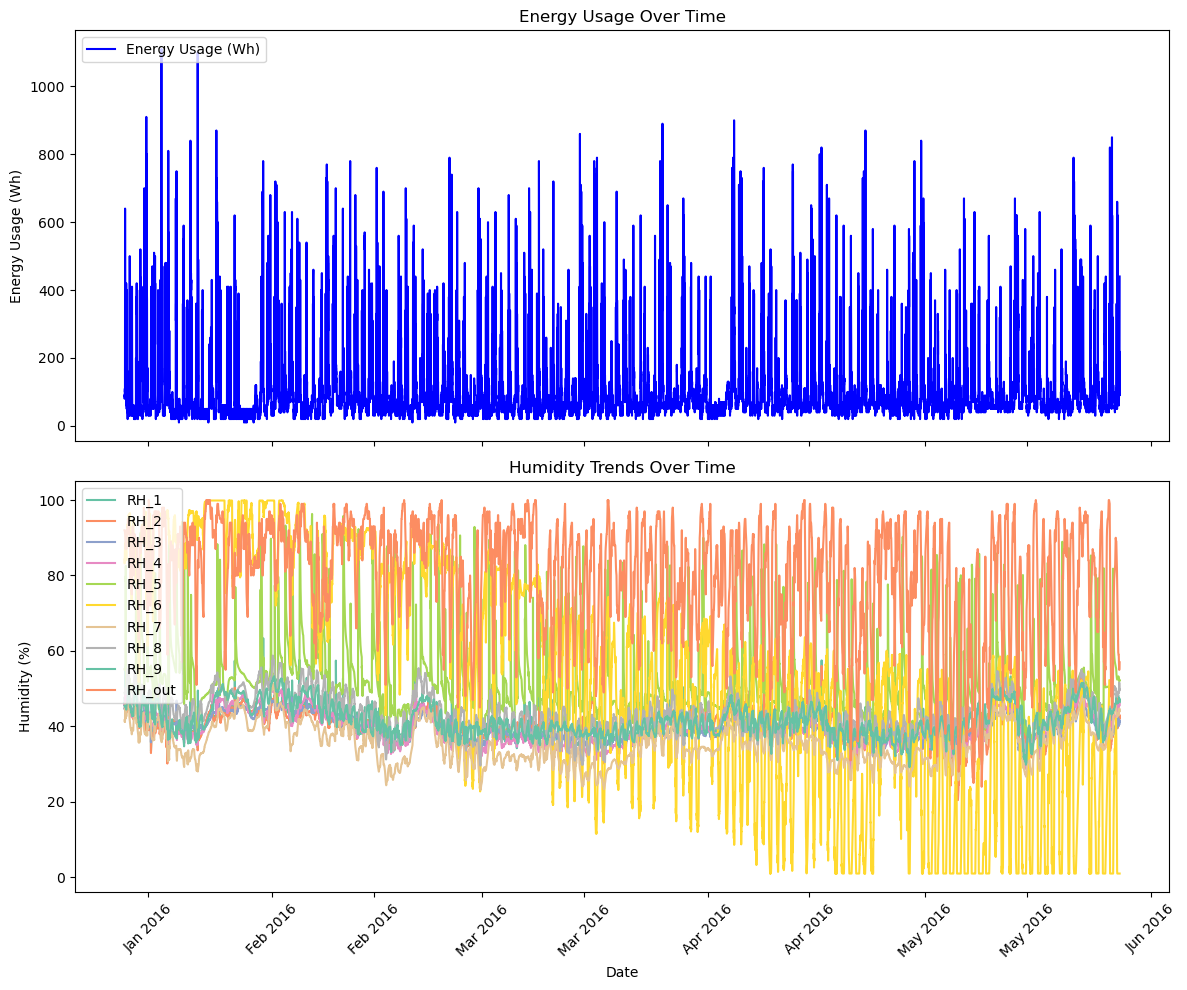

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  # For creating plots
import matplotlib.dates as mdates  # For handling date formatting

# Define the DataFrame
data_subset = data_copy  # Your DataFrame

# Define the humidity columns
humidity_columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9','RH_out']  # Humidity columns

# Create subplots with separate graphs for energy usage and humidity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)  # 2 rows, 1 column

# Plot energy usage on the first subplot
sns.lineplot(
    data=data_subset,
    x='date',
    y='TARGET_energy',  # Plot energy usage
    ax=ax1,  # Primary subplot
    color='blue',  # Line color for energy usage
    label='Energy Usage (Wh)',  # Label for the legend
)

# Set titles and labels for the first subplot
ax1.set_title('Energy Usage Over Time')  # Title for the first plot
ax1.set_ylabel('Energy Usage (Wh)')  # Y-axis label for energy usage

# Define a color palette for the humidity plots
humidity_palette = sns.color_palette("Set2", n_colors=len(humidity_columns))  # 10 distinct colors

# Plot humidity data on the second subplot with a custom color palette
for i, humidity in enumerate(humidity_columns):  # Iterate over the humidity columns
    sns.lineplot(
        data=data_subset,
        x='date',
        y=humidity,  # Humidity data
        ax=ax2,  # Secondary subplot
        label=humidity,  # Label for legend
        linestyle='-',  # Line style
        color=humidity_palette[i],  # Use the custom color palette
    )

# Set titles and labels for the second subplot
ax2.set_title('Humidity Trends Over Time')  # Title for the second plot
ax2.set_ylabel('Humidity (%)')  # Y-axis label for humidity

# Configure the x-axis for shared labeling and rotation
ax2.set_xlabel('Date')  # X-axis label for the second plot
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis for months and years
ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Add legends to each subplot
ax1.legend(loc='upper left')  # Legend for the first subplot
ax2.legend(loc='upper left')  # Legend for the second subplot

# Display the plots
plt.tight_layout()  # Adjust spacing between plots
plt.show()  # Show the figure with both subplots


### Inference from Seaborn Chart

- **Appliance Usage and Bathroom Humidity**:
  - The chart shows that energy usage peaks often align with bathroom humidity (`RH_5`) spikes, likely due to showering or bathing. This suggests a correlation between appliance usage and bathroom-related activities.

- **Outdoor Humidity (RH_6, RH_out)**:
  - Outdoor humidity (`RH_6`, `RH_out`) trends differ from indoor humidity, indicating that external weather conditions have their own patterns. These outdoor humidity levels might also influence indoor energy usage in some way.

- **Patterns and Correlations**:
  - There are observable patterns between energy usage and humidity changes, with peaks in energy possibly corresponding to increased bathroom humidity. The distinct trends in outdoor humidity suggest a separate influence on building conditions.

- **Further Considerations**:
  - Further analysis is needed to explore what drives these trends and correlations. Understanding how outdoor humidity interacts with indoor conditions and energy usage could provide additional insights into energy management and efficiency.


In [26]:
# Calculate the correlation between RH_5 and TARGET_energy
correlation_rh5_target = data_copy[['RH_5', 'TARGET_energy']].corr()  # Correlation matrix

# Display the correlation coefficient between RH_5 and TARGET_energy
correlation_rh5_target_value = correlation_rh5_target.loc['RH_5', 'TARGET_energy']  # Get correlation value
print("Correlation between RH_5 and TARGET_energy:", correlation_rh5_target_value)


Correlation between RH_5 and TARGET_energy: 0.017582981949234296


### Target_energy vs Outside weather temperature features(['T_out',..., 'Windspeed', 'Visibility', 'Tdewpoint'])

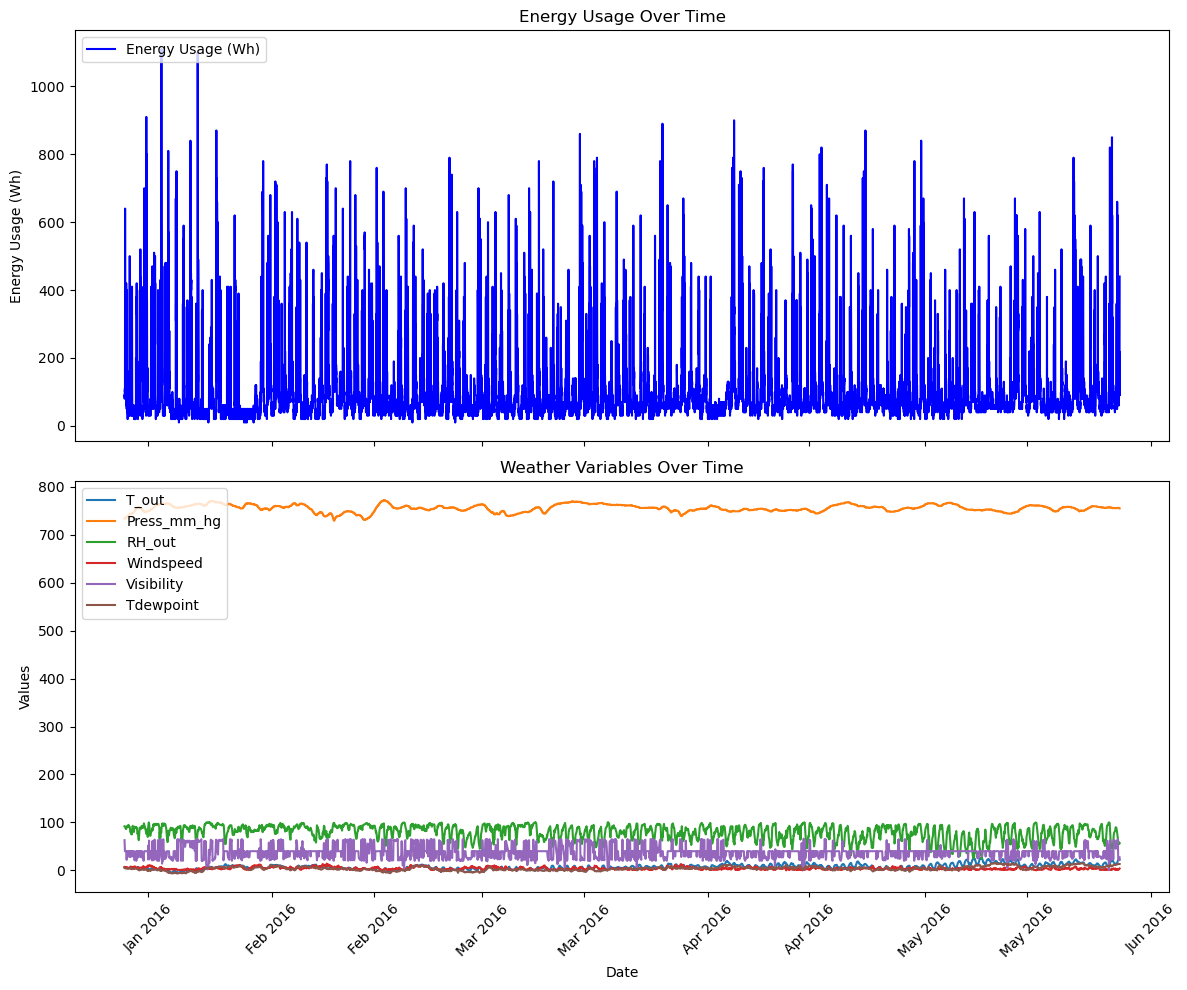

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  # For plotting
import matplotlib.dates as mdates  # For date formatting

# Define the DataFrame to use
data_subset = data_copy  # Your DataFrame with the data

# Define the outside temperature-related columns
outside_temperature_columns = ['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

# Create subplots for energy usage and weather-related variables
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)  # 2 rows, 1 column

# Plot energy usage on the first subplot
sns.lineplot(
    data=data_subset,
    x='date',  # Date on the x-axis
    y='TARGET_energy',  # Plot energy usage
    ax=ax1,  # Primary subplot
    color='blue',  # Line color for energy usage
    label='Energy Usage (Wh)',  # Label for the legend
)

# Set titles and labels for the first subplot
ax1.set_title('Energy Usage Over Time')  # Title for the first plot
ax1.set_ylabel('Energy Usage (Wh)')  # Y-axis label for energy usage

# Plot the weather-related variables on the second subplot
for i, column in enumerate(outside_temperature_columns):
    sns.lineplot(
        data=data_subset,
        x='date',  # Date on the x-axis
        y=column,  # Weather-related variable
        ax=ax2,  # Secondary subplot
        label=column,  # Label for legend
        linestyle='-',  # Line style
    )

# Set titles and labels for the second subplot
ax2.set_title('Weather Variables Over Time')  # Title for the second plot
ax2.set_ylabel('Values')  # Y-axis label

# Configure the x-axis for shared labeling and rotation
ax2.set_xlabel('Date')  # X-axis label for the second plot
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis for months and years
ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Add legends to each subplot
ax1.legend(loc='upper left')  # Legend for the first subplot
ax2.legend(loc='upper left')  # Legend for the second subplot

# Display the plots
plt.tight_layout()  # Adjust spacing for better appearance
plt.show()  # Show the figure with both subplots


### Inference from Outside Weather Variables and Energy Usage

- **Correlation between Temperature and Dewpoint**:
  - The plot reveals a correlation between outside temperature (`T_out`) and dewpoint (`Tdewpoint`). This pattern reflects the daily cycle, with both temperature and dewpoint peaking during daytime and dropping at night.

  - We can assume that the fluctuations in energy usage align with temperature and dewpoint changes, suggesting that appliance usage increases during the day, likely when residents are more active.

- **Limited Correlation with Other Weather Variables**:
  - Other weather-related factors, like windspeed, visibility, and atmospheric pressure, don't exhibit a clear relationship with energy usage, indicating they have less impact on appliance usage trends.



### Target_energy vs Random variable features(rv1, rv2)

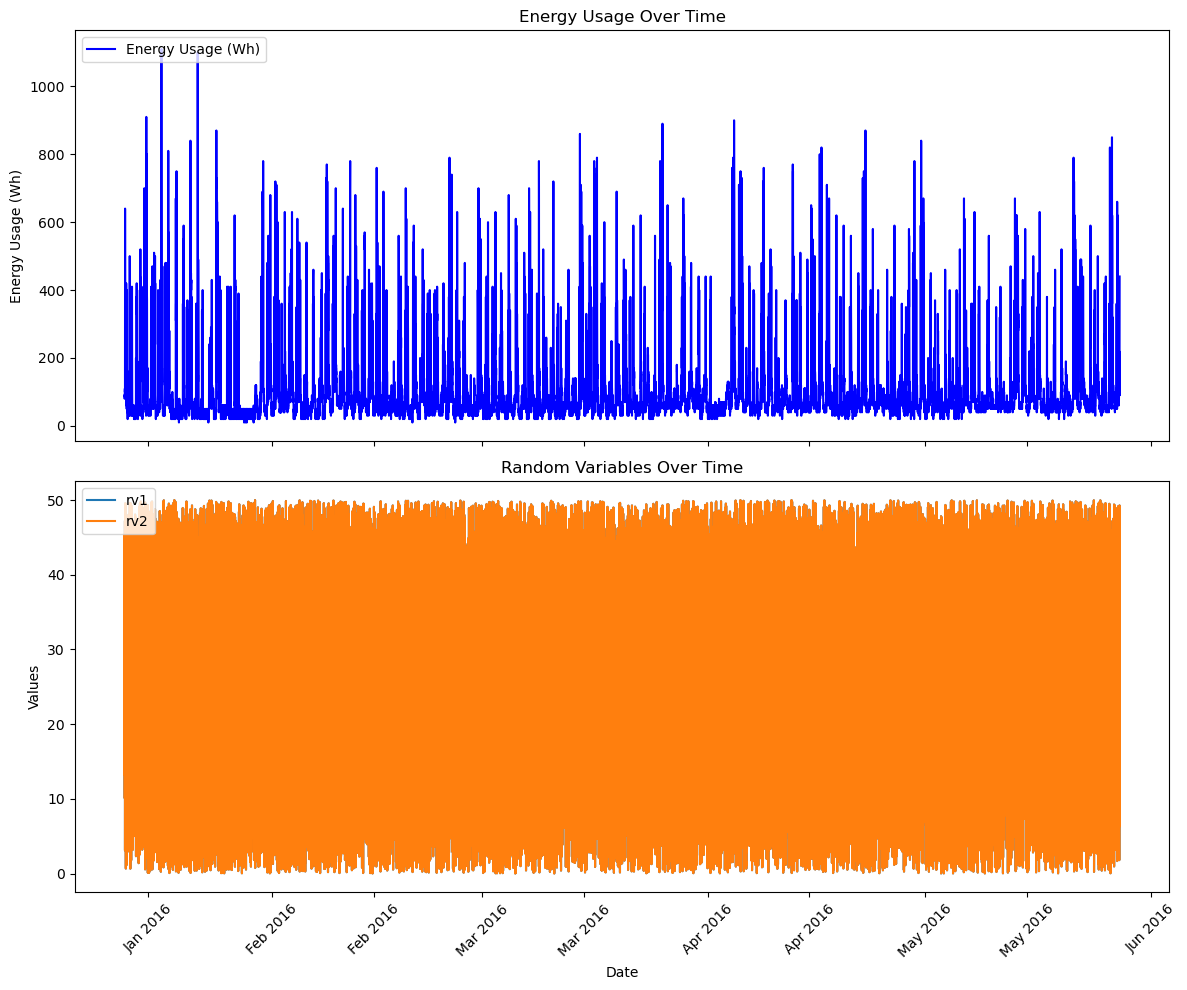

In [28]:
import seaborn as sns  # Seaborn for plotting
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import matplotlib.dates as mdates  # For date formatting

# Define the DataFrame to use
data_subset = data_copy  # Your DataFrame with the data

# Define the random variables
random_variables = ['rv1', 'rv2']  # Random variables in the dataset

# Create subplots for energy usage and random variables
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)  # 2 rows, 1 column

# Plot energy usage on the first subplot
sns.lineplot(
    data=data_subset,
    x='date',  # Date on the x-axis
    y='TARGET_energy',  # Plot energy usage
    ax=ax1,  # Primary subplot
    color='blue',  # Line color for energy usage
    label='Energy Usage (Wh)',  # Label for the legend
)

# Set titles and labels for the first subplot
ax1.set_title('Energy Usage Over Time')  # Title for the first plot
ax1.set_ylabel('Energy Usage (Wh)')  # Y-axis label for energy usage

# Plot the random variables on the second subplot
for variable in random_variables:
    sns.lineplot(
        data=data_subset,
        x='date',  # Date on the x-axis
        y=variable,  # Random variable
        ax=ax2,  # Secondary subplot
        label=variable,  # Label for legend
        linestyle='-',  # Line style
    )

# Set titles and labels for the second subplot
ax2.set_title('Random Variables Over Time')  # Title for the second plot
ax2.set_ylabel('Values')  # Y-axis label

# Configure the x-axis for shared labeling and rotation
ax2.set_xlabel('Date')  # X-axis label for the second plot
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis for months and years
ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Add legends to each subplot
ax1.legend(loc='upper left')  # Legend for the first subplot
ax2.legend(loc='upper left')  # Legend for the second subplot

# Display the plots
plt.tight_layout()  # Adjust spacing for better appearance
plt.show()  # Show the figure with both subplots


- We can see the random variable plot is so cluttered, we can make any interpretations from it

## Plotting Correlation Matrix

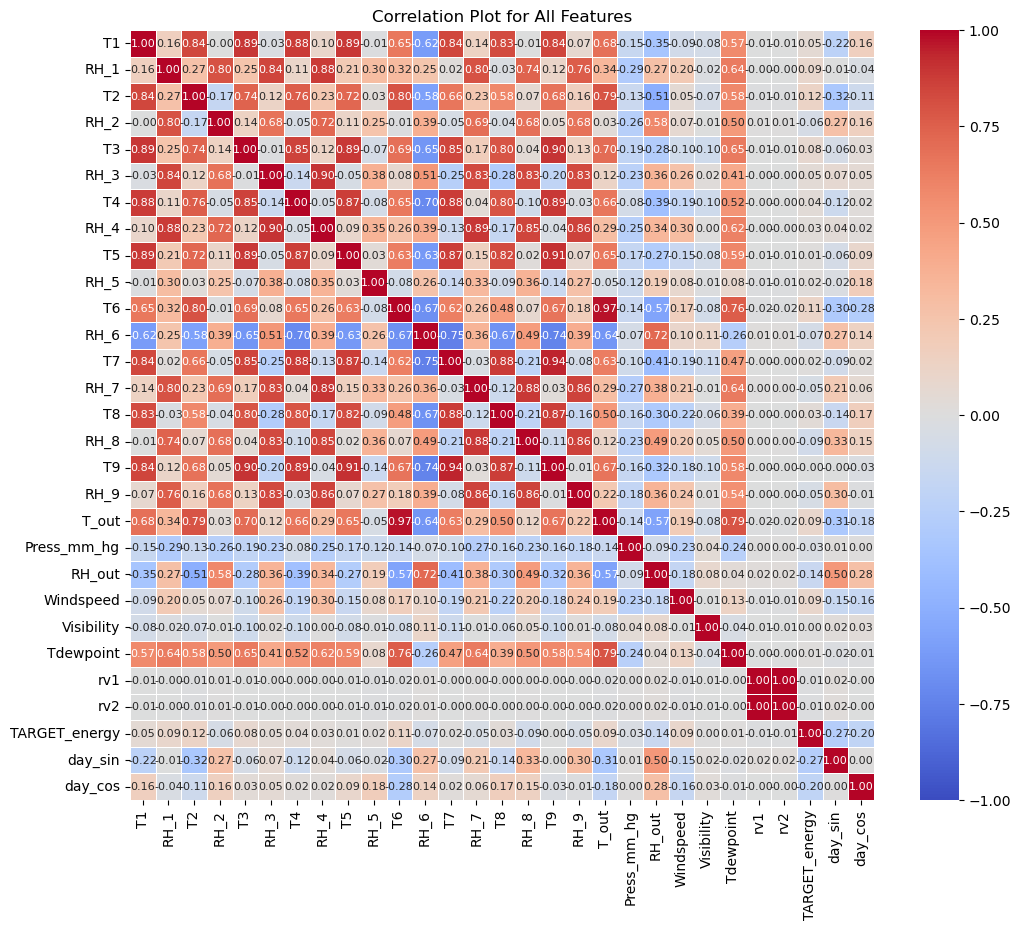

In [29]:
import seaborn as sns  # Seaborn for visualization
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for plotting

# Calculate the correlation matrix for all columns
correlation_matrix = data_copy.corr()  # Replace with your DataFrame variable name

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(12, 10))  # Set the plot size to ensure all data fits
heatmap = sns.heatmap(
    correlation_matrix,  # The correlation matrix to plot
    annot=True,  # Display correlation values within the heatmap
    fmt=".2f",  # Format for the correlation values (2 decimal places)
    cmap="coolwarm",  # Color map for the heatmap
    vmin=-1,  # Minimum value for the color scale
    vmax=1,  # Maximum value for the color scale
    linewidths=0.5,  # Add lines between cells
    linecolor='white',  # Line color between cells
    annot_kws={"size": 8}
)

# Set the title for the heatmap
plt.title("Correlation Plot for All Features")  # Plot title
plt.show()  # Display the heatmap


- As we can see the Target variable (Target_energy) is positively correlated with dependent variables T2, T6,RH1, T_out Windspeed

- Similarly it has negative correlation with RH2, RH6, RH7, Rh8, RH9, press_mm_hg, Tdewpoint, rv1,rv2
- It has very minimal correlation between variables like RH4, RH%, 

In [30]:

# Assuming the correlation matrix has already been calculated
correlation_matrix = data_copy.corr()  # Replace with your DataFrame variable name

# Get correlations with the target variable (e.g., `TARGET_energy`)
correlation_with_target = correlation_matrix['TARGET_energy']  # Correlations with target

# Sort the correlations in descending order
sorted_correlations = correlation_with_target.sort_values(ascending=False)  # Sort correlations

# Display the correlations
print("Correlations with TARGET_energy (sorted from highest to lowest):")
print(sorted_correlations)  # Display all correlations with target


Correlations with TARGET_energy (sorted from highest to lowest):
TARGET_energy    1.000000
T2               0.117525
T6               0.109540
RH_1             0.092741
T_out            0.091734
Windspeed        0.090157
T3               0.076157
T1               0.052638
RH_3             0.045707
T4               0.038898
T8               0.033476
RH_4             0.025436
RH_5             0.017583
T7               0.015054
T5               0.013391
Tdewpoint        0.012321
Visibility       0.001746
T9              -0.002104
rv1             -0.010911
rv2             -0.010911
Press_mm_hg     -0.034781
RH_9            -0.051191
RH_7            -0.051985
RH_2            -0.055434
RH_6            -0.070018
RH_8            -0.091372
RH_out          -0.144364
day_cos         -0.197621
day_sin         -0.270529
Name: TARGET_energy, dtype: float64


### Weak Correlations
Most of the correlation coefficients have absolute values below 0.2, indicating weak linear relationships with `TARGET_energy`. This suggests that these variables don't have a strong influence on energy usage.

- **Positive Weak Correlations**:
  The following variables have weak positive correlations with `TARGET_energy`: `T2`, `T6`, `RH_1`, `T_out`, `Windspeed`, `T3`, `T1`, `RH_3`, `T4`, `T8`, `RH_4`, `RH_5`, `T7`, `T5`, `Tdewpoint`, `Visibility`.

- **Negative Weak Correlations**:
  The following variables show weak negative correlations with `TARGET_energy`: `T9`, `rv2`, `rv1`, `Press_mm_hg`, `RH_9`, `RH_7`, `RH_2`, `RH_6`, `RH_8`, `RH_out`.


## Bi-Variate Analysis

In [31]:
# Function to find correlation pairs
def find_correlation_pairs(correlation_matrix, threshold_high=0.7, threshold_low=0.1):
    high_correlations = []
    low_correlations = []
    
    # Iterate through the upper triangle of the correlation matrix
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            
            if abs(correlation) >= threshold_high:
                high_correlations.append((var1, var2, correlation))  # High correlation
            elif abs(correlation) <= threshold_low:
                low_correlations.append((var1, var2, correlation))  # Low correlation
    
    return high_correlations, low_correlations

# Find high and low correlation pairs with defined thresholds
high_corr_pairs, low_corr_pairs = find_correlation_pairs(correlation_matrix, threshold_high=0.9, threshold_low=0.65)

print("High Correlation Pairs:")
for pair in high_corr_pairs:
    print(pair)

print("\nLow Correlation Pairs:")
for pair in low_corr_pairs:
    print(pair)


High Correlation Pairs:
('T3', 'T9', 0.9013083935241554)
('T5', 'T9', 0.9110542234820382)
('T6', 'T_out', 0.9747853953041666)
('T7', 'T9', 0.9448071577535698)
('rv1', 'rv2', 1.0)

Low Correlation Pairs:
('T1', 'RH_1', 0.1640181304148414)
('T1', 'RH_2', -0.002449308008590428)
('T1', 'RH_3', -0.02847482788724001)
('T1', 'RH_4', 0.097912756117935)
('T1', 'RH_5', -0.014793479147480634)
('T1', 'RH_6', -0.6150050161006823)
('T1', 'RH_7', 0.13515784939602485)
('T1', 'RH_8', -0.006389424310847368)
('T1', 'RH_9', 0.07183971328281091)
('T1', 'Press_mm_hg', -0.15058481972691828)
('T1', 'RH_out', -0.3454423138090851)
('T1', 'Windspeed', -0.08764387008669351)
('T1', 'Visibility', -0.07624203226498809)
('T1', 'Tdewpoint', 0.5712971631708689)
('T1', 'rv1', -0.006217045943511116)
('T1', 'rv2', -0.006217045943511116)
('T1', 'TARGET_energy', 0.052637896730150985)
('T1', 'day_sin', -0.2242530936367173)
('T1', 'day_cos', 0.15637785383139097)
('RH_1', 'T2', 0.26987383962811595)
('RH_1', 'T3', 0.25324388748

In [32]:
# Sort high correlation pairs in descending order by absolute correlation
high_corr_pairs_sorted = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)

# Sort low correlation pairs in ascending order by absolute correlation
low_corr_pairs_sorted = sorted(low_corr_pairs, key=lambda x: abs(x[2]), reverse=True)

# Display the sorted high correlation pairs
print("High Correlation Pairs (sorted in descending order):")
for pair in high_corr_pairs_sorted:
    print(pair)  # Display each high correlation pair in descending order

# Display the sorted low correlation pairs
print("\nLow Correlation Pairs (sorted in ascending order):")
for pair in low_corr_pairs_sorted:
    print(pair)  # Display each low correlation pair in ascending order


High Correlation Pairs (sorted in descending order):
('rv1', 'rv2', 1.0)
('T6', 'T_out', 0.9747853953041666)
('T7', 'T9', 0.9448071577535698)
('T5', 'T9', 0.9110542234820382)
('T3', 'T9', 0.9013083935241554)

Low Correlation Pairs (sorted in ascending order):
('T3', 'RH_6', -0.6476846299403151)
('T3', 'Tdewpoint', 0.6458723055952458)
('RH_7', 'Tdewpoint', 0.6418333240117287)
('RH_6', 'T_out', -0.6416049190873341)
('RH_1', 'Tdewpoint', 0.639077023872858)
('T5', 'RH_6', -0.6324461095396683)
('T7', 'T_out', 0.6312642566912039)
('T5', 'T6', 0.6291289044561231)
('T6', 'T7', 0.6190576904331828)
('RH_4', 'Tdewpoint', 0.6164873398171568)
('T1', 'RH_6', -0.6150050161006823)
('T5', 'Tdewpoint', 0.5883096018168789)
('RH_2', 'RH_out', 0.5848528502541015)
('T2', 'Tdewpoint', 0.5825694248615083)
('T9', 'Tdewpoint', 0.5814324350460339)
('T2', 'RH_6', -0.5803766052489184)
('T2', 'T8', 0.5781288057338481)
('T_out', 'RH_out', -0.5741950888291572)
('T1', 'Tdewpoint', 0.5712971631708689)
('T6', 'RH_out', 

### Bi-Variate Correlation Analysis - Summary

- **High Correlation Pairs**: 
  - There are strong linear relationships between some variables. For example, `rv1` and `rv2` are perfectly correlated, suggesting redundancy. Other pairs, like `T6` and `T_out`, or `T7` and `T9`, have high correlation, indicating a close relationship.

- **Low Correlation Pairs**:
  - Pairs with weak or negligible linear relationships, such as `T3` and `RH_6`, or `RH_1` and `Press_mm_hg`, show little connection. These low correlations suggest that these variables are largely independent.

The strong correlations suggest redundancy or closely linked data, while the weak correlations indicate more independence among variables, offering insights for further analysis.


In [33]:
np.int = np.int16
np.float = np.float16
np.bool = np.bool_

In [34]:
import pandas as pd  # Data manipulation
from sklearn.ensemble import RandomForestClassifier  # Random Forest for feature importance
from boruta import BorutaPy  # Boruta for feature selection

# Creating time-based features from a date column ('date' is the time column)
data_copy['hour'] = pd.to_datetime(data_copy['date']).dt.hour  # Extracting the hour
data_copy['day_of_week'] = pd.to_datetime(data_copy['date']).dt.dayofweek  # Extracting the day of the week
data_copy['is_weekend'] = data_copy['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)  # 1 for weekend, 0 for weekday
data_copy['month'] = pd.DatetimeIndex(data_copy['date']).month # Extracting the month

# Prepare the input features and target variable
X = data_copy.drop(['TARGET_energy', 'date'], axis=1)  # Exclude target and original date column
y = data_copy['TARGET_energy']  # Target variable

# Convert all features to numeric
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric, replace errors with NaN
y = pd.to_numeric(y, errors='coerce')  # Ensure the target is numeric

# Initialize Random Forest classifier for Boruta
rf = RandomForestClassifier(n_jobs=-1, random_state=42)  # Random Forest with parallel processing

# Initialize Boruta with Random Forest
boruta = BorutaPy(rf, n_estimators='auto', random_state=42)

# Fit Boruta to the data to identify important features
boruta.fit(X.values, y.values)

# Get the names of all features and their importance status
feature_importance = {
    'feature': X.columns,
    'support': boruta.support_,  # True if feature is important, False otherwise
    'ranking': boruta.ranking_  # Rank of the feature (1 is the most important)
}

# Convert to a DataFrame for easier visualization
feature_importance_df = pd.DataFrame(feature_importance)

print("Important Features (Boruta):")
print(feature_importance_df[feature_importance_df['support']])  # Show only important features

print("\nFeature Importance Ranking by order:")
print(feature_importance_df.sort_values(by='ranking'))  # Display all features sorted by ranking


Important Features (Boruta):
      feature  support  ranking
1        RH_1     True        1
2          T2     True        1
3        RH_2     True        1
5        RH_3     True        1
9        RH_5     True        1
10         T6     True        1
11       RH_6     True        1
13       RH_7     True        1
14         T8     True        1
15       RH_8     True        1
17       RH_9     True        1
18      T_out     True        1
20     RH_out     True        1
23  Tdewpoint     True        1
26    day_sin     True        1
27    day_cos     True        1
28       hour     True        1

Feature Importance Ranking by order:
        feature  support  ranking
15         RH_8     True        1
20       RH_out     True        1
26      day_sin     True        1
18        T_out     True        1
17         RH_9     True        1
27      day_cos     True        1
28         hour     True        1
14           T8     True        1
13         RH_7     True        1
10           T6  

In [35]:
# Ensure `feature_importance_df` contains the Boruta feature importance data
feature_importance_df = feature_importance_df.sort_values(by='ranking', ascending=True)  # Sort by 'ranking'

# Display the ordered list of features with their rankings
print("Features ordered by importance (from most to least important):")
print(feature_importance_df[['feature', 'support', 'ranking']])  # Display the relevant information

Features ordered by importance (from most to least important):
        feature  support  ranking
15         RH_8     True        1
20       RH_out     True        1
26      day_sin     True        1
18        T_out     True        1
17         RH_9     True        1
27      day_cos     True        1
28         hour     True        1
14           T8     True        1
13         RH_7     True        1
10           T6     True        1
11         RH_6     True        1
5          RH_3     True        1
3          RH_2     True        1
2            T2     True        1
1          RH_1     True        1
9          RH_5     True        1
23    Tdewpoint     True        1
6            T4    False        2
7          RH_4    False        3
4            T3    False        4
24          rv1    False        5
25          rv2    False        6
8            T5    False        7
12           T7    False        8
0            T1    False        9
16           T9    False       10
21    Windspeed    

### Splitting Data into Train and Test set


In [36]:
# Splitting the dataset into training and testing sets
# X_train and X_test contain the input features (excluding 'TARGET_energy' and 'date')
# y_train and y_test contain the corresponding target variable 'TARGET_energy'
# The test size is set to 20% of the total dataset
# Random state 42 is used for reproducibility
# Additionally, the target variables are converted to DataFrame format for consistency

X_train, X_test, y_train, y_test = train_test_split(data_copy.drop(columns=['TARGET_energy','date']), data_copy['TARGET_energy'], test_size=0.2, random_state=42)
y_train = y_train.to_frame()
y_test = y_test.to_frame()

### Feature Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, RobustScaler
import warnings

# Suppressing FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Define attributes for log-normalization and min-max scaling
logNorm_attributes = ['RH_out', 'RH_5']
minmax_attributes = list(set(X_train.columns).difference(set(logNorm_attributes)))

# Initialize scalers for robust scaling and power transformation
robustscaler = RobustScaler()
y_power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

# Copying the original datasets for scaling
X_train_scaled__ = X_train.copy()
X_test_scaled__ = X_test.copy()
y_train_scaled__ = y_train.copy()
y_test_scaled__ = y_test.copy()

# Perform robust scaling on input features
X_train_scaled_ = robustscaler.fit_transform(X_train_scaled__)
X_test_scaled_ = robustscaler.transform(X_test_scaled__)

# Initialize scaler for target variable (y) robust scaling
y_robustscaler = RobustScaler()
y_train_scaled_ = y_robustscaler.fit_transform(y_train_scaled__)
y_test_scaled_ = y_robustscaler.transform(y_test_scaled__)

# Convert scaled input features back to DataFrame format
X_train_scaled = pd.DataFrame(X_train_scaled_, index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_, index=X_test.index, columns=X_test.columns)

# Perform min-max scaling on selected attributes
minmaxscaler = MinMaxScaler().fit(X_train_scaled.loc[:, minmax_attributes])
X_train_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(X_train_scaled.loc[:, minmax_attributes])
X_test_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(X_test_scaled.loc[:, minmax_attributes])

# Perform log-normal transformation and min-max scaling on specified attributes
powertransformer = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train_scaled.loc[:, logNorm_attributes])
X_train_scaled.loc[:, logNorm_attributes] = powertransformer.transform(X_train_scaled.loc[:, logNorm_attributes])
X_test_scaled.loc[:, logNorm_attributes] = powertransformer.transform(X_test_scaled.loc[:, logNorm_attributes])

# Perform min-max scaling on log-normalized attributes
minmaxscaler_pt = MinMaxScaler().fit(X_train_scaled.loc[:, logNorm_attributes])
X_train_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(X_train_scaled.loc[:, logNorm_attributes])
X_test_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(X_test_scaled.loc[:, logNorm_attributes])

# Perform power transformation on the target variable
y_train_scaled = y_power_transformer.fit_transform(y_train_scaled__)
y_test_scaled = y_power_transformer.transform(y_test_scaled__)


- Feature scaling and transformation were conducted to enhance model performance. Initially, `RobustScaler` was employed to standardize features and mitigate outliers. `PowerTransformer` was then applied to address skewed distributions. 
- Additionally, min-max scaling was performed on specified attributes, while log-normal transformation followed by min-max scaling was applied to others. Finally, the target variable underwent power transformation. Notably, employing `RobustScaler` initially aided in outlier removal, contributing to improved model effectiveness.

In [38]:
# Making a copy of the data frame
data_copy = data_copy.drop(columns=['date'])

### Plotting Histogram Before Feature Scaling

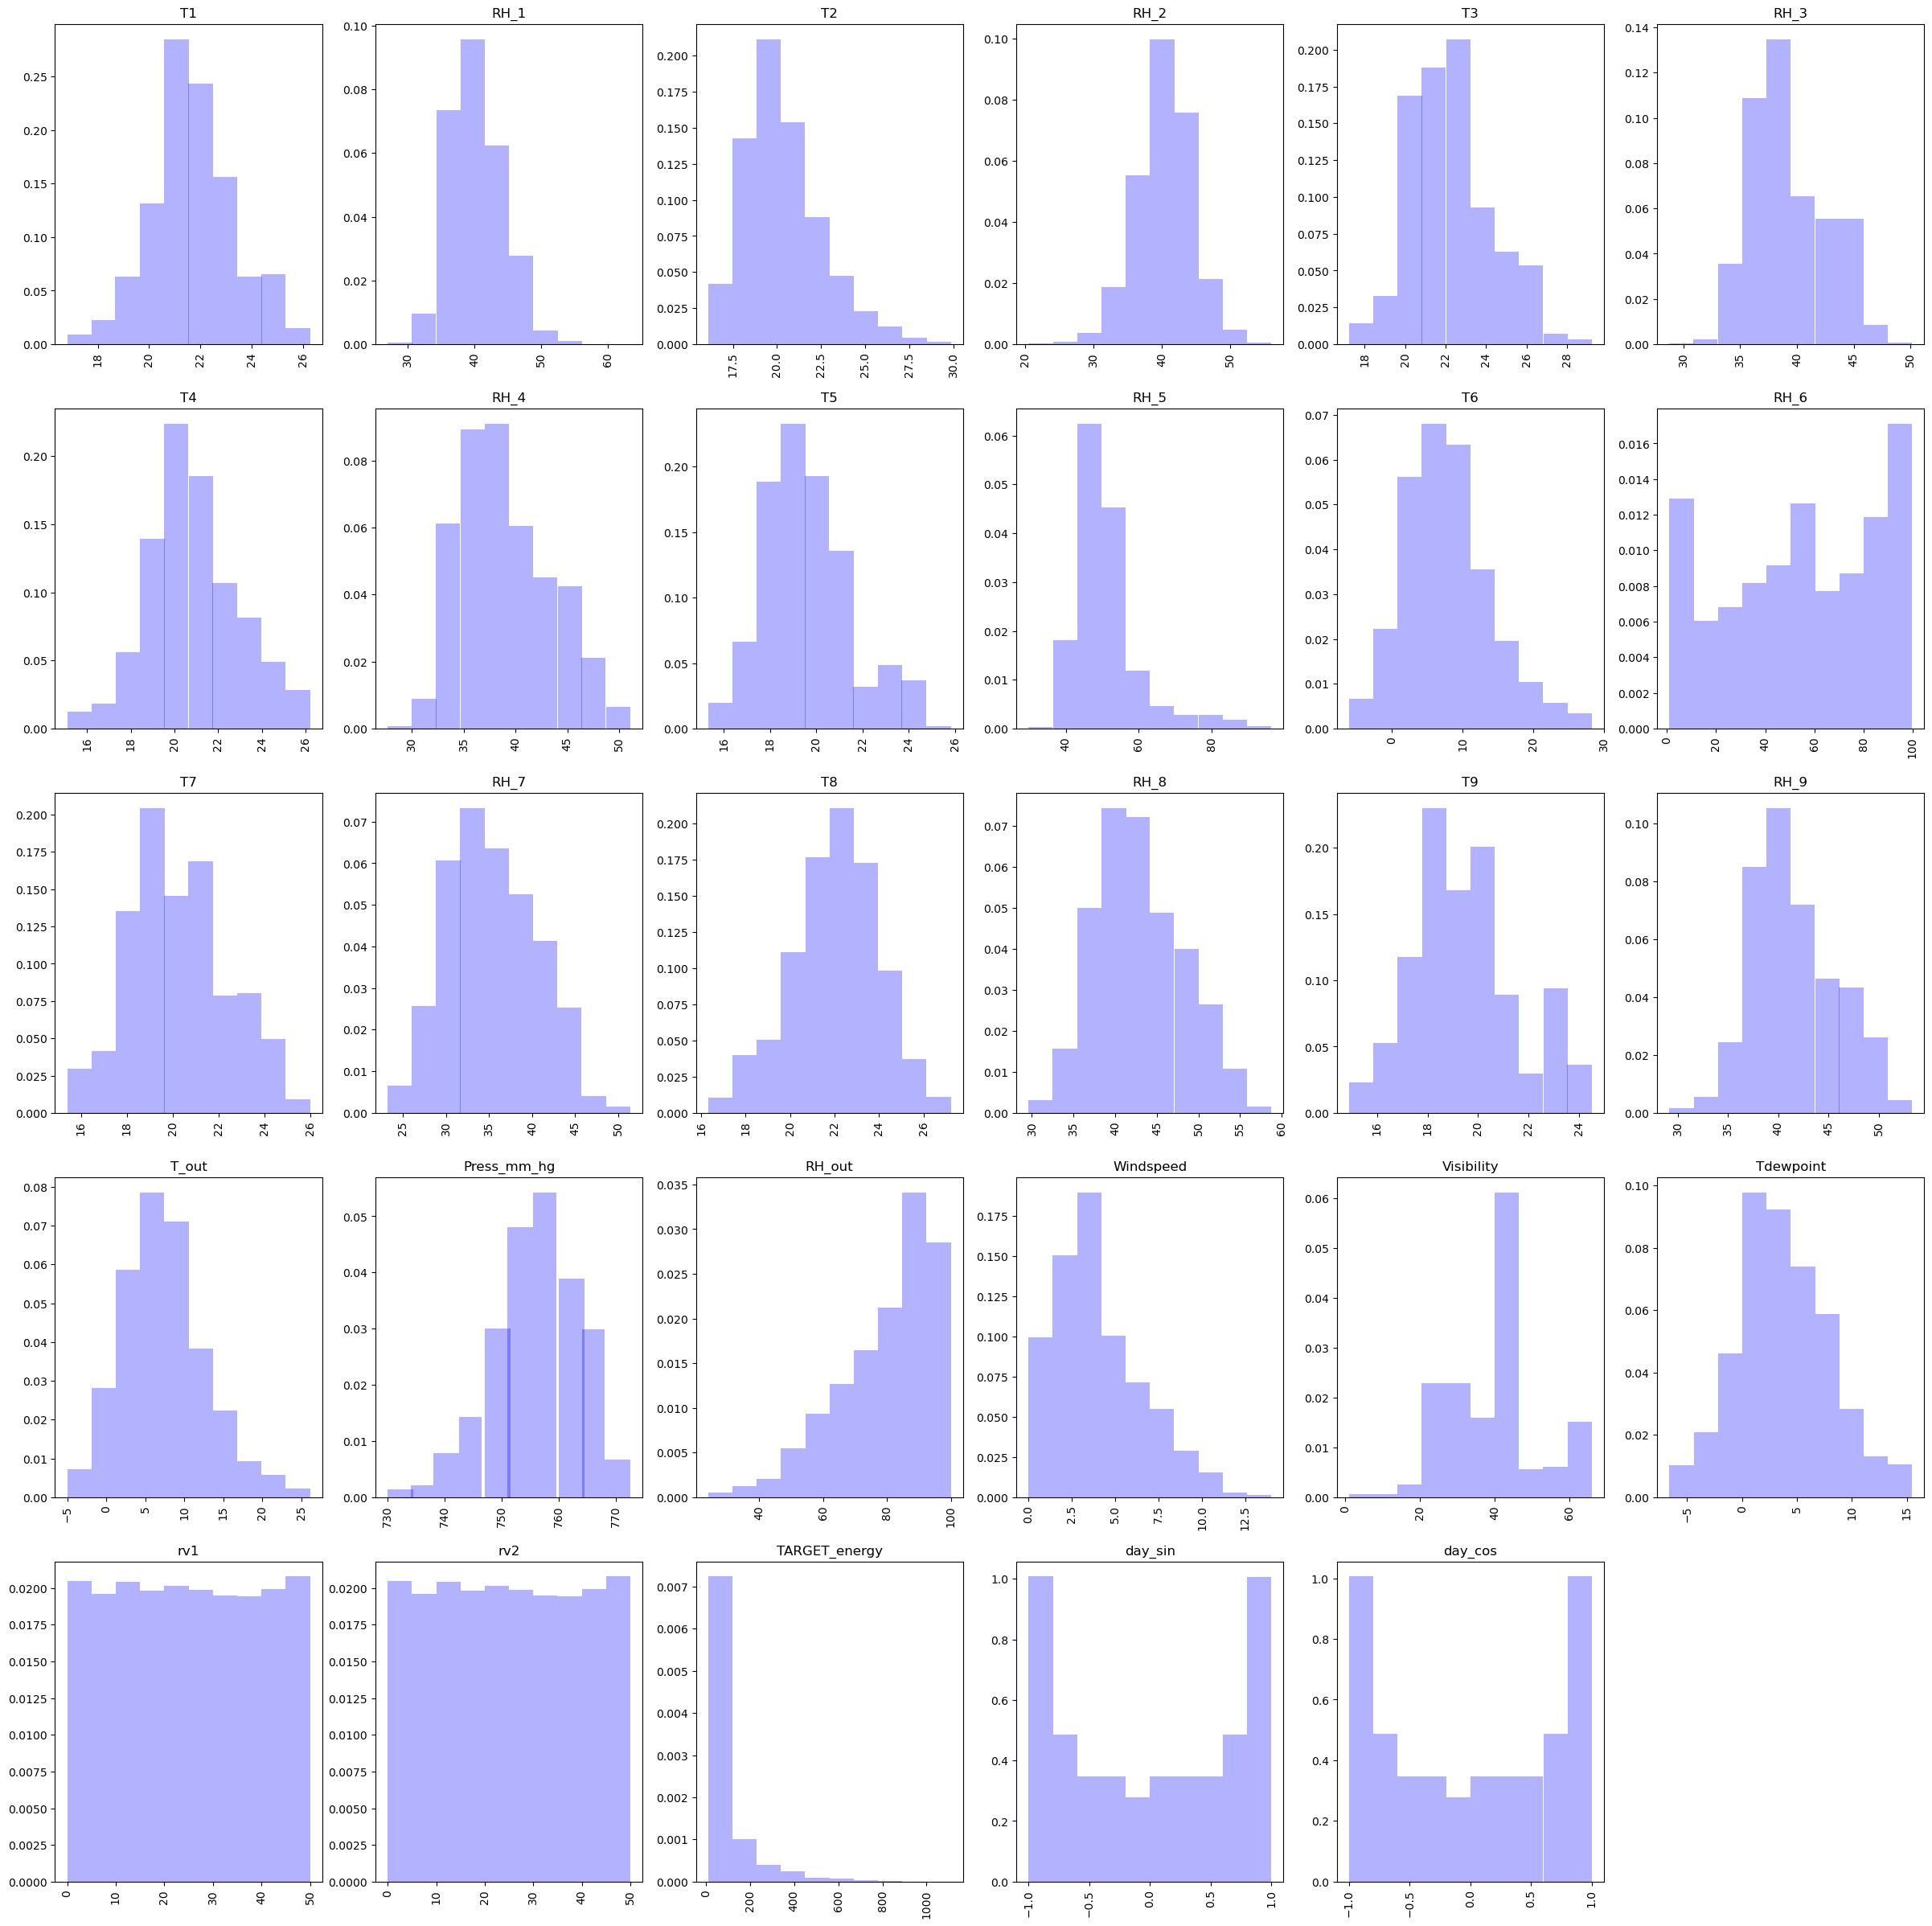

In [39]:
plt.figure(figsize=(30,30))
for i, col in enumerate(box_df.columns):
    plt.subplot(5,6,i+1)
    plt.hist(box_df[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

- As we can see `T2, T3, RH6, Windspeed, T6` is right skewed
- And features like `RH_out, Press_mm_hg` are left skewed
- The histogram shows varying scales across features which will be resolved after feature scaling

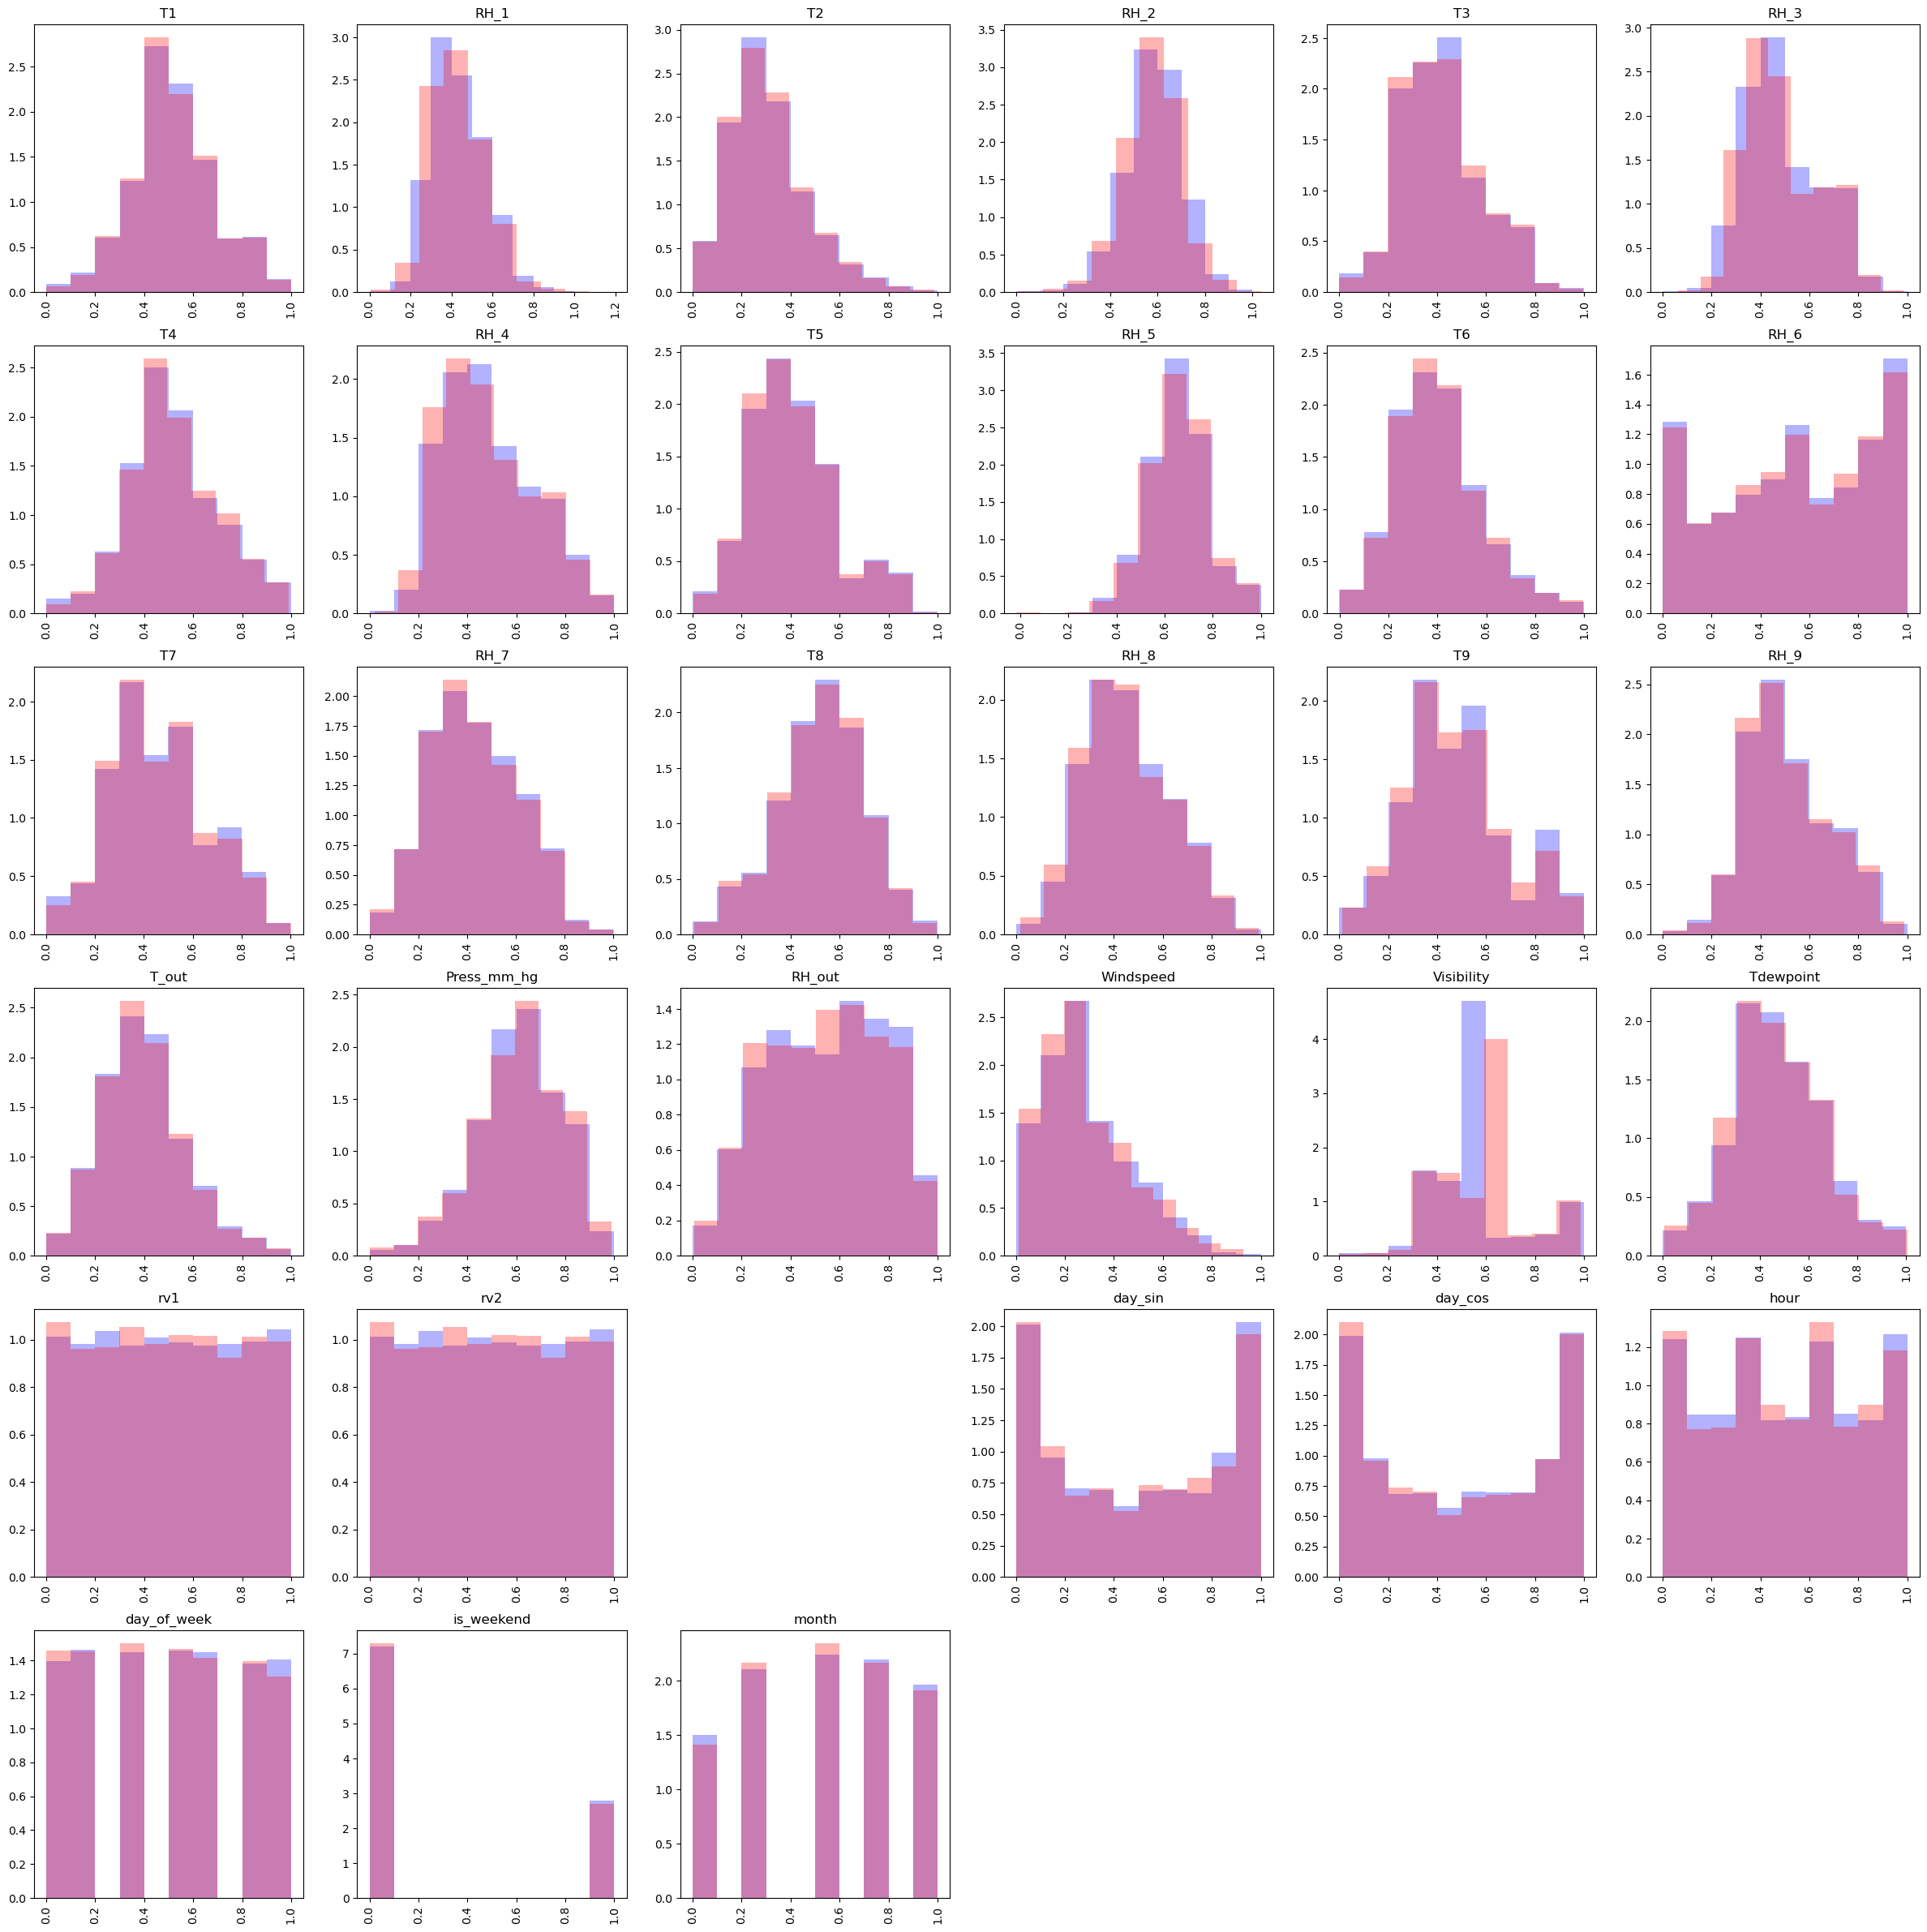

In [40]:
plt.figure(figsize=(30,30))
for i, col in enumerate(data_copy.columns):
    if col == 'TARGET_energy':
        plt.subplot(5,6,i+1)
        plt.hist(y_train_scaled, alpha=0.3, color='b', density=True)
        plt.hist(y_test_scaled, alpha=0.3, color='r', density=True)
        plt.title(col)
        plt.xticks(rotation='vertical')
    else:
        plt.subplot(6,6,i+1)
        plt.hist(X_train_scaled[col], alpha=0.3, color='b', density=True)
        plt.hist(X_test_scaled[col], alpha=0.3, color='r', density=True)
        plt.title(col)
        plt.xticks(rotation='vertical')


- The histograms show varying scales before feature scaling, indicating potential differences in the distributions of the data and once it is scaled all the features have come to a single scale  and features like `RH_out`, `RH5` distribution have come close to normal distribution curve 

# Random Forest


## Baseline Model (Random Forest - 1)

### Fitting, Predicting and Evaluating RF model 1

In [41]:
# Initializing RandomForest Regressor model and training it with training data
rf_model = RandomForestRegressor(random_state=100)

# Fitting the RF model
rf_model.fit(X_train_scaled, y_train_scaled)
# Prediction for the test set
predictions = rf_model.predict(X_test_scaled)

# Calculation Evaluation Matrix (R2, MSE, MAE, RMSE)
rf_r2 = r2_score(y_test_scaled, predictions)
rf_mse = mean_squared_error(y_test_scaled, predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test_scaled, predictions)

# Printing the Evaluation Matrix Results
print("Baseline Random Forest-1 Model Performance:")
print(f"R^2 Score: {rf_r2:.5f}")
print(f"Mean Squared Error: {rf_mse:.5f}")
print(f"Root Mean Squared Error: {rf_rmse:.5f}")
print(f"Mean Absolute Error: {rf_mae:.5f}")


C:\Users\arvin\AppData\Local\Temp\ipykernel_34384\220997397.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_scaled, y_train_scaled)


Baseline Random Forest-1 Model Performance:
R^2 Score: 0.73254
Mean Squared Error: 0.27336
Root Mean Squared Error: 0.52284
Mean Absolute Error: 0.35909


### Baseline Random Forest - 1 Model Accuracy

- The Baseline Random Forest model achieved an `R^2` score of `0.73254`, indicating that approximately `73.3%` of the variance in the target variable is explained by the features.
- The model's mean squared error `(MSE) is 0.27336`, suggesting that, on average, the squared difference between the predicted and actual values is 0.27292.
- With a root mean squared error `(RMSE) of 0.52284`, the model's predictions are, on average, approximately 0.52242 units away from the actual values.
- The mean absolute error `(MAE) of 0.35909` indicates that, on average, the model's predictions deviate from the actual values by approximately 0.35930 units.

## Improving Baseline RF Model Performance

### Performing Feature Importance using Boruta Regressor model

In [40]:
X = X_train_scaled
y = y_train_scaled
# Initialize Random Forest classifier for Boruta
rf = RandomForestRegressor(n_jobs=-1, random_state=42)  # Random Forest with parallel processing

# Initialize Boruta with Random Forest
boruta = BorutaPy(rf, n_estimators='auto', random_state=42)

# Fit Boruta to the data to identify important features
boruta.fit(X.values,y)

# Get the names of all features and their importance status
feature_importance = {
    'feature': X.columns,
    'support': boruta.support_,  # True if feature is important, False otherwise
    'ranking': boruta.ranking_  # Rank of the feature (1 is the most important)
}

# Convert to a DataFrame for easier visualization
feature_importance_df = pd.DataFrame(feature_importance)

print("Important Features (Boruta):")
print(feature_importance_df[feature_importance_df['support']])  # Show only important features

print("\nFeature Importance Ranking by order:")
print(feature_importance_df.sort_values(by='ranking'))  # Display all features sorted by ranking


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d

Important Features (Boruta):
        feature  support  ranking
0            T1     True        1
1          RH_1     True        1
2            T2     True        1
3          RH_2     True        1
4            T3     True        1
5          RH_3     True        1
6            T4     True        1
7          RH_4     True        1
8            T5     True        1
9          RH_5     True        1
10           T6     True        1
11         RH_6     True        1
12           T7     True        1
13         RH_7     True        1
14           T8     True        1
15         RH_8     True        1
16           T9     True        1
17         RH_9     True        1
18        T_out     True        1
19  Press_mm_hg     True        1
20       RH_out     True        1
21    Windspeed     True        1
22   Visibility     True        1
23    Tdewpoint     True        1
26      day_sin     True        1
27      day_cos     True        1
28         hour     True        1
29  day_of_week    

#### Inference from Boruta Regressor Feature selection Model

- **Key Features Identified:** Boruta selected features crucial for predicting TARGET_energy. The support=True designation indicates significance, while a ranking of 1 means top importance. This group includes various time data features, humidity features, `temperature (T1)`,`day of the week, hour of the day` and `the hour of the day`.
- **Feature Rankings:** The lower the ranking number, the more significant the feature. Features with support=False don't contribute meaningfully to prediction. Higher ranking numbers suggest reduced relevance,  as shown in `month` and random variables (`rv1 and rv2`).

- The Boruta feature selection process identified key predictors for our model. These include `temperature (T1), day of the week, hour of the day, and environmental factors like dewpoint, visibility, windspeed, outdoor humidity (RH_out), and atmospheric pressure (Press_mm_hg)`. Other variables like `month` and random variables (`rv1 and rv2`) and 'weekend' were found to have less impact on our predictions.


#### Dropping Unimportant features before improving the baseline RF model

- Features to be removed based on Boruta models output are = [`month`, `rv1`,`rv2`,`is_weekend`]

In [42]:
# Removing those 4 features from Train set

X_train_scaled = X_train_scaled.drop(['month', 'rv1', 'rv2', 'is_weekend'],axis=1)

In [43]:
# Removing those 4 features from Test set

X_test_scaled = X_test_scaled.drop(['month', 'rv1', 'rv2', 'is_weekend'],axis=1)

## Improving Baseline Model (Random Forest - 2)


### Fitting, Predicting and Evaluating RF model 2

In [43]:
# Initializing and training the Random Forest model with random state as 100
rf_model = RandomForestRegressor(random_state=100)
rf_model.fit(X_train_scaled, y_train_scaled)

# Performing prediction for the test set
predictions = rf_model.predict(X_test_scaled)

# Calculating Evaluation Metrics
rf_r2 = r2_score(y_test_scaled, predictions)
rf_mse = mean_squared_error(y_test_scaled, predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test_scaled, predictions)

# Printing the Results
print("Random Forest- 2 Model Performance:")
print(f"R^2 Score: {rf_r2:.5f}")
print(f"Mean Squared Error: {rf_mse:.5f}")
print(f"Root Mean Squared Error: {rf_rmse:.5f}")
print(f"Mean Absolute Error: {rf_mae:.5f}")

/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest- 2 Model Performance:
R^2 Score: 0.74181
Mean Squared Error: 0.26389
Root Mean Squared Error: 0.51370
Mean Absolute Error: 0.35280


### Baseline Random Forest -2 Model Accuracy
- The Random Forest model showed improved performance compared to the previous model. It achieved an `R^2 score` of `0.74181`, increased by 0.8% indicating better explanation of the variance in the target variable. Furthermore, it displayed `lower mean squared error (MSE)`, root mean squared error `(RMSE)`, and mean absolute error `(MAE)`, indicating enhanced predictive accuracy and reduced deviation from the actual values

## Improving Baseline Model (Random Forest - 3) using RandomSearchCV


### HyperParameter Tuning - Performing Random Search

- First, we randomly explore a predefined range of hyperparameters through `random search`. This involves assessing `various combinations of hyperparameters` without any specific order.

- Next, we `narrow down the range of hyperparameters` that show promise based on the `random search results`. 

In [44]:
# Random serach to get range of optimal parameters


In [45]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [46]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train_scaled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  14.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  14.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  14.7s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  37.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  37.8s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  44.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  44.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  44.8s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  35.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  35.2s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  39.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  36.3s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  39.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  39.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=True, max_depth=

/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  40.2s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  35.8s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  56.6s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  56.9s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  57.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  36.8s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  36.5s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  45.3s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  45.8s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  44.8s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  48.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  48.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 1.0min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 1.0min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 1.0min
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  39.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  40.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  50.4s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  39.5s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  36.5s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  36.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  36.5s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  42.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  42.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time= 1.5min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time= 1.5min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time= 1.5min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time= 1.5min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=  48.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  26.4s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time= 1.6min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time= 1.5min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  26.4s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=  23.3s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  32.4s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  33.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  33.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time= 1.4min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  40.6s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time= 1.4min
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time= 1.4min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  40.9s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  41.4s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  41.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=  53.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=  54.2s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=  53.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  41.3s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  41.5s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  43.8s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=  24.2s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=  23.9s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  44.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=  24.4s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  44.4s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  52.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  53.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  36.9s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  36.4s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  36.4s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  39.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=  54.6s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  39.2s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  20.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  20.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=  20.2s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  36.2s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  35.9s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  36.2s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  41.2s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  12.3s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  25.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  11.9s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  11.9s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  25.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  24.6s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  17.6s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  18.2s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  18.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  37.9s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  37.9s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_d

/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  38.9s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  32.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  31.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  55.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  31.6s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  55.7s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, 

/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  54.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=  27.5s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=  27.6s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=  28.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.6s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.8s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.5s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   8.6s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time= 1.2min
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=  44.5s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time= 1.2min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   9.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, ma

/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   9.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=  44.9s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time= 1.2min
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=  45.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  50.8s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  50.5s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  50.3s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  50.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  49.8s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  50.3s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time= 1.1min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time= 1.1min
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  36.2s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  35.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=  35.8s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=  19.8s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=  19.9s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=  19.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1400; total time= 1.1min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time= 1.0min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time= 1.0min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time= 1.0min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  21.3s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  54.4s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=True, max_depth=100

/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  54.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=  53.5s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  22.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  22.5s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  38.2s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 1.2min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 1.2min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 1.2min


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  39.4s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  31.6s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  38.3s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  31.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  15.4s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  14.9s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  14.9s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  30.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=  23.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=  23.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=  23.6s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  21.3s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  21.2s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  48.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  21.4s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  47.9s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  19.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  19.5s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  48.7s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   0.0s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  20.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  27.7s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  27.8s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=False, max_depth=

/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  28.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=  27.1s


/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=  27.3s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=  26.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time= 1.4min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time= 1.4min
[CV] END bootstrap=False, max_de

/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [47]:
# getting the best Parameters using the RandomSearchCV

rf_random.best_params_


{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

These are the best hyperparameters obtained from `RandomizedSearchCV`:

- Number of Estimators: 600
- Minimum Samples Split: 2
- Minimum Samples Leaf: 2
- Maximum Features: 'sqrt'
- Maximum Depth: 110
- Bootstrap: False

These parameters were found to yield the `best performance` for the Random Forest model.

In [44]:

# Initializing and Fitting RF with the best parameters got from RandomsearchCV
rf_model = RandomForestRegressor(n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=110, bootstrap=False)
rf_model.fit(X_train_scaled, y_train_scaled)

# Making Predictions
predictions = rf_model.predict(X_test_scaled)

# Performing Evaluation Metrics
rf_r2 = r2_score(y_test_scaled, predictions)
rf_mse = mean_squared_error(y_test_scaled, predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test_scaled, predictions)

# Print the results
print("Random Forest Model-3 Performance with best performing hyperparameters from RandomsearchCV:")
print(f"R^2 Score: {rf_r2:.5f}")
print(f"Mean Squared Error: {rf_mse:.5f}")
print(f"Root Mean Squared Error: {rf_rmse:.5f}")
print(f"Mean Absolute Error: {rf_mae:.5f}")

C:\Users\arvin\AppData\Local\Temp\ipykernel_34384\1905689048.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_scaled, y_train_scaled)


Random Forest Model-3 Performance with best performing hyperparameters from RandomsearchCV:
R^2 Score: 0.76757
Mean Squared Error: 0.23756
Root Mean Squared Error: 0.48740
Mean Absolute Error: 0.33508


### Baseline Random Forest - 3 Model Accuracy
The `updated Random Forest model` exhibits improved performance compared to the previous iteration:

- **R^2 Score**: Increased from 0.74181 to 0.76757, indicating better explanatory power of the model.
- **Mean Squared Error (MSE)**: Reduced from 0.26389 to 0.23756, signifying a decrease in prediction errors.
- **Root Mean Squared Error (RMSE)**: Decreased from 0.51370 to 0.487405, suggesting improved accuracy in predicting values.
- **Mean Absolute Error (MAE)**: Lowered from 0.35280 to 0.33508, indicating a decrease in average prediction deviation from the actual values.

Overall, the model enhancements resulted in better predictive performance, with `higher R^2 score` and `reduced errors` across all metrics.

In [49]:
# Grid search Cv in range determined by random search

In [50]:
# optimal parameter of random forest model 

In [132]:
rf_model = RandomForestRegressor(n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=90, bootstrap=False)
rf_model.fit(X_train_scaled, y_train_scaled)
predictions = rf_model.predict(X_test_scaled)
rf_r2 = r2_score(y_test_scaled, predictions)
rf_mse = mean_squared_error(y_test_scaled, predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test_scaled, predictions)
print("Random Forest Model Performance:")
print(f"R^2 Score: {rf_r2:.5f}")
print(f"Mean Squared Error: {rf_mse:.5f}")
print(f"Root Mean Squared Error: {rf_rmse:.5f}")
print(f"Mean Absolute Error: {rf_mae:.5f}")

Random Forest Model Performance:
R^2 Score: 0.76931
Mean Squared Error: 0.23579
Root Mean Squared Error: 0.48558
Mean Absolute Error: 0.33430


## Feature Importance of final model 

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

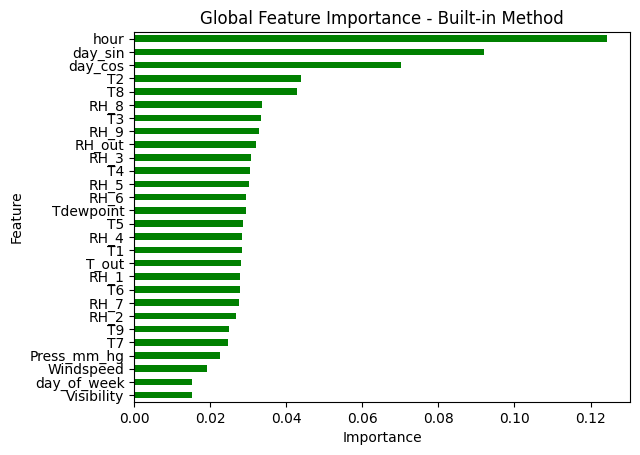

In [53]:

# Calculating feature importances for the Random Forest model
global_importances = pd.Series(rf_model.feature_importances_, index=X_train_scaled.columns)

# Sorting feature importances in ascending order
global_importances.sort_values(ascending=True, inplace=True)

# Plot feature importances as a horizontal bar chart
global_importances.plot.barh(color='green')

# Label x-axis as "Importance" and y-axis as "Feature"
plt.xlabel("Importance")
plt.ylabel("Feature")

# Set the title of the plot
plt.title("Global Feature Importance - Built-in Method")

- From the bar chart, it's evident that features such as `hour`, `day_sin`, `day_cos`, `T8`, and `T2` have the `highest importance` in predicting energy consumption. These variables likely capture significant patterns in `energy usage`, such as `time of day and temperature fluctuations`. 
- Conversely, `day_of_week`, `visibility`, `windspeed`, and `press_mm_hg appear` to have `lower importance`, suggesting they contribute `less` to the model's predictive power.


### Comparing Best Random Forest Model with Unscaled parameters against Paper1 RF

In [67]:
X_test = X_test.drop(['month', 'rv1', 'rv2', 'is_weekend'],axis=1)
X_train = X_train.drop(['month', 'rv1', 'rv2', 'is_weekend'],axis=1)

In [68]:
rf_unscaled = RandomForestRegressor(n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=50, bootstrap=False)
# Fitting the unscaled data to train
rf_unscaled.fit(X_train, y_train)
# making predictions on the test set
predictions = rf_unscaled.predict(X_test)

# Calculating performance metrics to evaluate the model performance
rf_r2 = r2_score(y_test, predictions)
rf_mse = mean_squared_error(y_test, predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, predictions)

/opt/anaconda3/envs/regression2/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [69]:
print("Random Forest Model Performance:")
print(f"R^2 Score: {rf_r2:.5f}")
print(f"Mean Squared Error: {rf_mse:.5f}")
print(f"Root Mean Squared Error: {rf_rmse:.5f}")
print(f"Mean Absolute Error: {rf_mae:.5f}")

Random Forest Model Performance:
R^2 Score: 0.66533
Mean Squared Error: 3486.80361
Root Mean Squared Error: 59.04916
Mean Absolute Error: 27.06311


- Through the use of scaling techniques to reduce the impact of outliers and hyperparameter tuning we were able to `reduce` the `RMSE by 14.24 %`, `increase r2 by 22.22%` and `reduce MAE by 15.04%`.  


### Residual Analysis

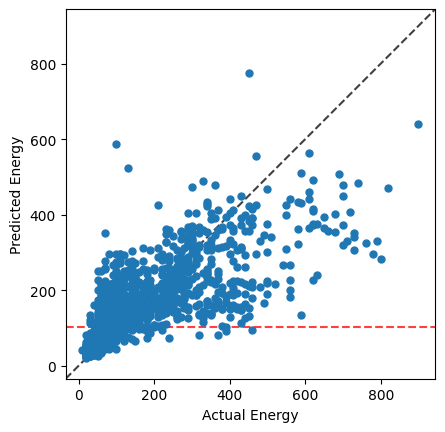

In [70]:
warnings.filterwarnings("ignore", category=UserWarning)
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, s=25, cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax.plot(lims, [np.mean(y_train),]*2, 'r--', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')

plt.show()

- We can see from the residual plot that, the model is able to `generalise better for the energy data values in the range of 0 to 200`, after that we can see there are some outliers present as indicated by the box plot in the EDA section.

### LSTM MODEL

In [71]:
# Importing Necessary Libraries
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, InputLayer, Conv1D, Flatten, GRU
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError, R2Score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [72]:
energy = data_copy[['TARGET_energy']]

In [73]:
X = sorted_df.drop(['date', 'TARGET_energy'], axis=1)
y = energy

In [74]:
lstm_features = data_copy.drop([ 'is_weekend','month','hour','day_of_week'], axis=1)

### Feature Scaling

In [75]:

# Import necessary libraries for scaling and warnings
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, RobustScaler
import warnings
import pandas as pd

# Ignore specific future warnings to keep the output clean
warnings.filterwarnings("ignore", category=FutureWarning)

# Define the attributes for log-normal transformation and min-max scaling
logNorm_attributes = ['RH_out', 'RH_5', 'TARGET_energy']
minmax_attributes = list(set(lstm_features.columns).difference(set(logNorm_attributes)))

# Initialize the RobustScaler for robust scaling of the features
robustscaler = RobustScaler()

# Initialize the PowerTransformer for transforming the target variable using Yeo-Johnson method
y_power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

# Apply robust scaling to the features
features_scaled__ = robustscaler.fit_transform(lstm_features)    

# Convert the scaled features back to a DataFrame
features_scaled_ = pd.DataFrame(features_scaled__, index=lstm_features.index, columns=lstm_features.columns)

# Initialize and fit the MinMaxScaler for the features that need min-max scaling
minmaxscaler = MinMaxScaler().fit(features_scaled_.loc[:, minmax_attributes])

# Apply min-max scaling to the selected attributes
features_scaled_.loc[:, minmax_attributes] = minmaxscaler.transform(features_scaled_.loc[:, minmax_attributes])

# Initialize and fit the PowerTransformer for the attributes that need log-normal transformation
powertransformer = PowerTransformer(method='yeo-johnson', standardize=True).fit(features_scaled_.loc[:, logNorm_attributes])

# Apply the power transformation to the selected attributes
features_scaled_.loc[:, logNorm_attributes] = powertransformer.transform(features_scaled_.loc[:, logNorm_attributes])

# Initialize and fit another MinMaxScaler for the power-transformed attributes
minmaxscaler_pt = MinMaxScaler().fit(features_scaled_.loc[:, logNorm_attributes])

# Apply min-max scaling to the power-transformed attributes
features_scaled_.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(features_scaled_.loc[:, logNorm_attributes])


In [76]:
# Removing these features based on correlation matrix
lstm_features_ = lstm_features.drop(['rv1','rv2','T9','T6','day_sin','day_cos'],axis=1)

In [77]:
lstm_features_.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'TARGET_energy'],
      dtype='object')

In [78]:
lstm_features = lstm_features[['TARGET_energy','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]

- These functions below reshaped the data into the following formats:
- **Univariate** : [[e1], [e2], … , [en]] , [en+1]
- **Multivariate:** [[e1,v1, … , k1], [e2,v2, … , k2], … , [en, vn, … , kn]] , [en+1]
- **en=** energy value at time n 
- **n=** window size 
- **V,...,k** = variables v to k.
The CNN-LSTM model will then use the values from the specified window size n to predict the energy values at time step n+1.  

In [80]:
# function to convert dataframe to X and y values used in LSTM (univariate)
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [81]:
# function to convert dataframe to X and y values used in LSTM (multivariate)
def df_to_X_y_2(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

### Baseline Model

In [82]:
energy = features_scaled_['TARGET_energy']

In [83]:
# Convert the dataframe to feature matrix X and target vector y with a window size of 6
X, y = df_to_X_y(energy, 6)

# Determine the number of samples for training (80% of the data)
train_num = int(len(X) * 0.8)

# Determine the number of samples for validation (90% of the data)
val_num = int(len(X) * 0.9)

# Split the data into training set (first 80% of the data)
X_train, y_train = X[:train_num], y[:train_num]

# Split the data into validation set (next 10% of the data)
X_val, y_val = X[train_num:val_num], y[train_num:val_num]

# Split the data into test set (remaining 10% of the data)
X_test, y_test = X[val_num:], y[val_num:]
   

In [84]:
# baseline LSTM CNN model used to predict energy values

# Initializing the Sequential model
base_model = Sequential()

# Add an InputLayer with the shape (6, 1)
base_model.add(InputLayer((6, 1)))

# Add a Conv1D layer with 64 filters and a kernel size of 2
base_model.add(Conv1D(64, kernel_size=2))

# Flatten the output from the Conv1D layer
base_model.add(Flatten())

# Add a Dense layer with 8 units and ReLU activation
base_model.add(Dense(8, activation='relu'))

# Add a Dense layer with 1 unit and linear activation (output layer)
base_model.add(Dense(1, activation='linear'))

# Initialize EarlyStopping to monitor validation loss with patience of 15 epochs
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Initialize ModelCheckpoint to save the best model based on validation loss
cp = ModelCheckpoint('base_model/.keras', save_best_only=True)

# Compile the model with Adam optimizer, Mean Squared Error loss, and evaluation metrics
base_model.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

# Fit the model on the training data with validation data, for 300 epochs, and using the callbacks
base_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, callbacks=[cp, es])

# Predict the test data and flatten the predictions
test_predictions = base_model.predict(X_test).flatten()

# Calculate the R-squared score for the test predictions
base_r2 = r2_score(y_test, test_predictions)

# Calculate the Mean Squared Error for the test predictions
base_mse = mean_squared_error(y_test, test_predictions)

# Calculate the Mean Absolute Error for the test predictions
base_mae = mean_absolute_error(y_test, test_predictions)

# Calculate the Root Mean Squared Error from the MSE
base_rmse = np.sqrt(base_mse)

Epoch 1/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - loss: 0.0725 - mean_absolute_error: 0.1971 - root_mean_squared_error: 0.2534 - val_loss: 0.0073 - val_mean_absolute_error: 0.0604 - val_root_mean_squared_error: 0.0854
Epoch 2/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.0113 - mean_absolute_error: 0.0772 - root_mean_squared_error: 0.1065 - val_loss: 0.0066 - val_mean_absolute_error: 0.0572 - val_root_mean_squared_error: 0.0814
Epoch 3/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.0099 - mean_absolute_error: 0.0717 - root_mean_squared_error: 0.0994 - val_loss: 0.0063 - val_mean_absolute_error: 0.0557 - val_root_mean_squared_error: 0.0792
Epoch 4/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.0091 - mean_absolute_error: 0.0682 - root_mean_squared_error: 0.0954 - val_loss: 0.0064 - val_mean_absolute_error: 0.0561 - val_root_mean_squared_error: 0.0799
Epoch 5/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.0086 - mean_absolute_error: 0.0664 

In [85]:
# Function plots results of LSTM model
def plot_results(test_predictions, y_test):
    plt.figure(figsize=(10, 6))
    plt.plot(test_predictions, label='Predictions')
    plt.plot(y_test, label='True Values')
    plt.title('Energy Predictions')
    plt.xlabel('Time')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()

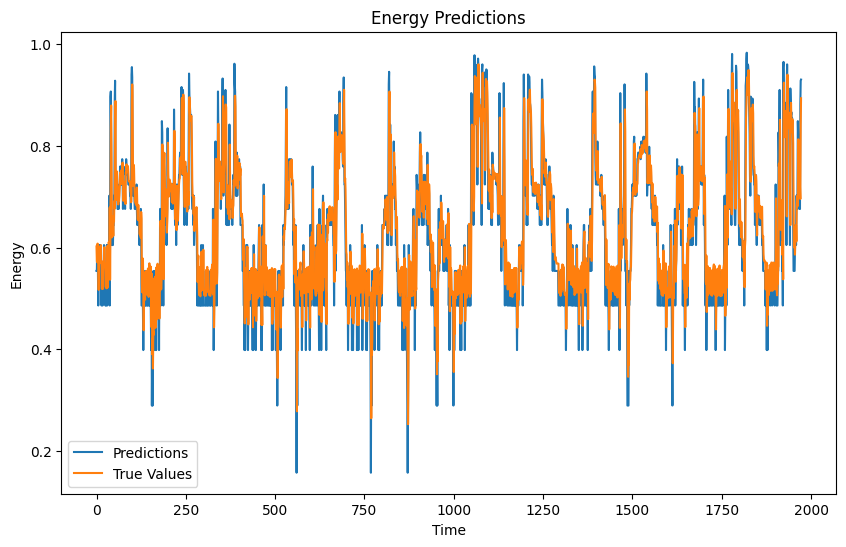

In [86]:
# test set results of baseline model
plot_results(y_test, test_predictions)

In [87]:
### Write inference here

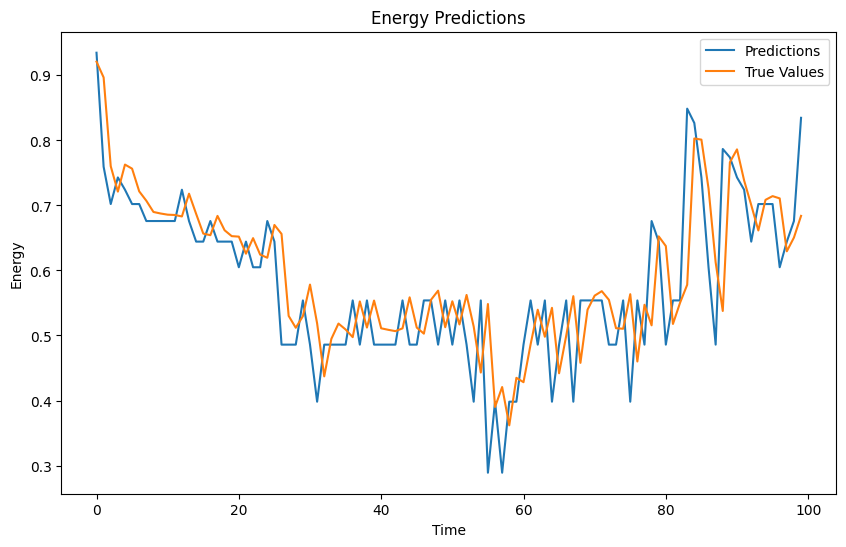

In [88]:
# Smaller timeframe provides better visualisation of results
plot_results(y_test[100:200], test_predictions[100:200])

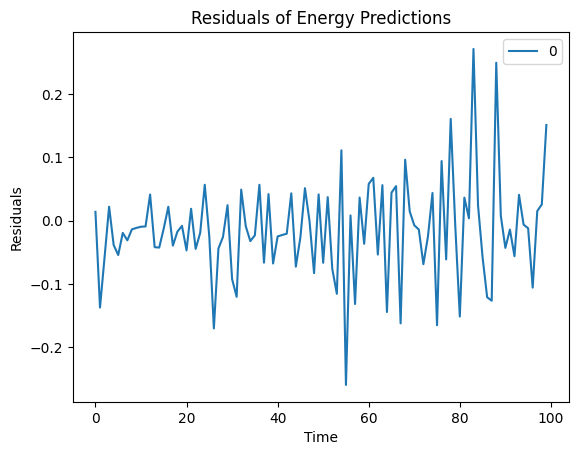

In [89]:
res_test = y_test[100:200]
res_pred = test_predictions[100:200]
residuals = [res_test[i]-res_pred[i] for i in range(len(res_test))]
residuals = pd.DataFrame(residuals)
# plot residuals
residuals.plot()
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals of Energy Predictions')
plt.show()

In [90]:
# baseline performance

print(f'r2: {base_r2.round(5)}, mse: {base_mse.round(3)}, mae: {base_mae.round(3)}, rmse: {base_rmse.round(3)}')

r2: 0.70134, mse: 0.006000000052154064, mae: 0.05400000140070915, rmse: 0.07500000298023224


### Baseline Model

For the baseline model, we used a univariate model that predicted energy expenditure from previous energy values.

**Baseline Model settings:**
- Window size: 6
- Learning rate: 0.0001
- Number of filters: 64
- Kernel size: 2
- Features: TARGET_energy
- Loss function: Mean Squared Error (MSE)

**Performance on test set:**
- R²: 0.70134
- MSE: 0.006
- MAE: 0.054
- RMSE: 0.075


## Improving LSTM baseline model

To `improve this model` we completed the following steps:
- Feature selection.
- Parameter tuning. 
- Window size tuning.


### Feature Selection

In [91]:
lstm_features

TARGET_energy         T1      RH_1         T2      RH_2  \
date                                                                           
2016-01-11 17:00:00             90  19.890625  47.59375  19.203125  44.78125   
2016-01-11 17:10:00             90  19.890625  46.68750  19.203125  44.71875   
2016-01-11 17:20:00             80  19.890625  46.31250  19.203125  44.62500   
2016-01-11 17:30:00             90  19.890625  46.06250  19.203125  44.59375   
2016-01-11 17:40:00            100  19.890625  46.34375  19.203125  44.53125   
...                            ...        ...       ...        ...       ...   
2016-05-27 17:20:00            100  25.562500  46.56250  25.890625  42.03125   
2016-05-27 17:30:00             90  25.500000  46.50000  25.750000  42.09375   
2016-05-27 17:40:00            280  25.500000  46.59375  25.625000  42.78125   
2016-05-27 17:50:00            430  25.500000  47.00000  25.406250  43.03125   
2016-05-27 18:00:00            440  25.500000  46.59375  25.265625  42.96875   

                            T3      RH_3         T4      RH_4         T5  ...  \
date                                                                      ...   
2016-01-11 17:00:00  19.796875  44.71875  19.000000  45.56250  17.171875  ...   
2016-01-11 17:10:00  19.796875  44.78125  19.000000  46.00000  17.171875  ...   
2016-01-11 17:20:00  19.796875  44.93750  18.921875  45.87500  17.171875  ...   
2016-01-11 17:30:00  19.796875  45.00000  18.890625  45.71875  17.171875  ...   
2016-01-11 17:40:00  19.796875  45.00000  18.890625  45.53125  17.203125  ...   
...                        ...       ...        ...       ...        ...  ...   
2016-05-27 17:20:00  27.203125  41.15625  24.703125  45.59375  23.203125  ...   
2016-05-27 17:30:00  27.140625  41.21875  24.703125  45.59375  23.234375  ...   
2016-05-27 17:40:00  27.046875  41.68750  24.703125  45.71875  23.234375  ...   
2016-05-27 17:50:00  26.890625  41.28125  24.703125  45.78125  23.203125  ...   
2016-05-27 18:00:00  26.828125  41.15625  24.703125  45.96875  23.203125  ...   

                         RH_7         T8      RH_8      RH_9      T_out  \
date                                                                      
2016-01-11 17:00:00  41.62500  18.203125  48.90625  45.53125   6.601562   
2016-01-11 17:10:00  41.56250  18.203125  48.87500  45.56250   6.484375   
2016-01-11 17:20:00  41.43750  18.203125  48.71875  45.50000   6.367188   
2016-01-11 17:30:00  41.28125  18.093750  48.59375  45.40625   6.250000   
2016-01-11 17:40:00  41.21875  18.093750  48.59375  45.40625   6.132812   
...                       ...        ...       ...       ...        ...   
2016-05-27 17:20:00  44.50000  24.703125  50.06250  46.78125  22.734375   
2016-05-27 17:30:00  44.40625  24.703125  49.78125  46.78125  22.593750   
2016-05-27 17:40:00  44.40625  24.703125  49.65625  46.78125  22.468750   
2016-05-27 17:50:00  44.28125  24.656250  49.53125  46.81250  22.328125   
2016-05-27 18:00:00  44.06250  24.734375  49.75000  46.84375  22.203125   

                     Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint  
date                                                                          
2016-01-11 17:00:00        733.5  92.00000   7.000000   63.000000   5.300781  
2016-01-11 17:10:00        733.5  92.00000   6.667969   59.156250   5.199219  
2016-01-11 17:20:00        733.5  92.00000   6.332031   55.343750   5.101562  
2016-01-11 17:30:00        734.0  92.00000   6.000000   51.500000   5.000000  
2016-01-11 17:40:00        734.0  92.00000   5.667969   47.656250   4.898438  
...                          ...       ...        ...         ...        ...  
2016-05-27 17:20:00        755.0  55.65625   3.333984   23.671875  13.335938  
2016-05-27 17:30:00        755.0  56.00000   3.500000   24.500000  13.296875  
2016-05-27 17:40:00        755.0  56.34375   3.666016   25.328125  13.265625  
2016-05-27 17:50:00        755.0  56.65625   3.833984   26.171875  13.234375  
20

In [92]:
# list of all features in dataset (used to find most important features)
features = features_scaled_.columns
features = features.values
f_list = []
for i in features:
    if i == 'date':
        continue
    else:
        f_list.append(i)

f_list.remove('TARGET_energy')

- To select features we **paired each feature** with the **target energy value** and used **multivariate models** to see if the feature **decreased** the **MSE** of the model. 


In [93]:
# function loops through all features and trains a model on each feature + past energy values
# returns a list of dictionaries with the feature name, model results and % increase 
def feature_importance(f_list):
    hist = []
    for f in f_list:
        feature = features_scaled_[['TARGET_energy', f]]
        X, y = df_to_X_y_2(feature, 6)
        X_train, y_train = X[:train_num], y[:train_num]
        X_val, y_val = X[train_num:val_num], y[train_num:val_num]
        X_test, y_test = X[val_num:], y[val_num:]
        model = Sequential()
        model.add(InputLayer((6, 2)))
        model.add(Conv1D(64, kernel_size=2))
        model.add(Flatten())
        model.add(Dense(8, 'relu'))
        model.add(Dense(1, 'linear'))
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
        cp = ModelCheckpoint('model/.keras', save_best_only=True)
        model.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError(), MeanAbsoluteError(), R2Score()])
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, callbacks=[cp,es])
        test_predictions = model.predict(X_test).flatten()
        r2 = r2_score(y_test, test_predictions)
        mse = mean_squared_error(y_test, test_predictions)
        mae = mean_absolute_error(y_test, test_predictions)
        rmse = np.sqrt(mse)
        val_results = {'r2':r2, 'mse':mse, 'mae':mae, 'rmse':rmse}


        hist.append([{f:val_results }])
    return hist

In [94]:
feature_impact = feature_importance(f_list)

Epoch 1/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - loss: 0.0756 - mean_absolute_error: 0.2036 - r2_score: -1.5243 - root_mean_squared_error: 0.2579 - val_loss: 0.0076 - val_mean_absolute_error: 0.0614 - val_r2_score: 0.5768 - val_root_mean_squared_error: 0.0872
Epoch 2/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.0119 - mean_absolute_error: 0.0790 - r2_score: 0.5944 - root_mean_squared_error: 0.1090 - val_loss: 0.0071 - val_mean_absolute_error: 0.0590 - val_r2_score: 0.6077 - val_root_mean_squared_error: 0.0840
Epoch 3/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.0111 - mean_absolute_error: 0.0753 - r2_score: 0.6324 - root_mean_squared_error: 0.1054 - val_loss: 0.0066 - val_mean_absolute_error: 0.0566 - val_r2_score: 0.6340 - val_root_mean_squared_error: 0.0811
Epoch 4/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0099 - mean_absolute_error: 0.0715 - r2_score: 0.6705 - root_mean_squared_error: 0.0995 - val_loss: 0.0063 - val_mean_absolute_error:

In [95]:
# printing each features mse reduction percentage
percent_increase = []
feat = []
for feature in feature_impact:
    for f in feature:
        for k, v in f.items():
            percent = ((base_mse - v['mse'])/base_mse)*100
            feat.append(k)
            percent_increase.append(percent.round(3))

# create dataframe of feature importance
feature_importance_df = pd.DataFrame({'feature':feat, 'percent_increase':percent_increase})

In [96]:
feature_importance_df 

feature  percent_increase
0            T1            -0.706
1          RH_1            -1.330
2            T2             1.512
3          RH_2             1.087
4            T3             0.103
5          RH_3             1.487
6            T4             1.362
7          RH_4            -3.001
8            T5            -0.417
9          RH_5             1.666
10           T6             2.333
11         RH_6             1.996
12           T7            -6.139
13         RH_7             0.936
14           T8             6.179
15         RH_8            -5.291
16           T9             1.598
17         RH_9             0.707
18        T_out             0.501
19  Press_mm_hg             1.148
20       RH_out             0.514
21    Windspeed             1.405
22   Visibility             0.761
23    Tdewpoint             0.953
24          rv1             0.334
25          rv2            -2.623
26      day_sin            -3.100
27      day_cos             3.945

- After calculating the reductions in `mse of each variable` we tested combinations of `multivariate models`, `adding features` based on `% increase threshold limits`. Eg. add all features that `decreased mse by 1%, 2%, etc… `. The highest-performing model utilised the features `[T8, day_cos]` which will be performed and displayed below.


### Test Feature Improvement limits

In [97]:
# functions tests groups of features to see if they are beneficial to the model 
def benefitial_lim(feature_imppact,features_scaled_,lim,mse):
    beneficial_features = []
    for feature in feature_impact:
        for f in feature:
            for k, v in f.items():
                percent = ((mse - v['mse'])/mse)*100
                if percent > lim:
                    beneficial_features.append(k)
    features = features_scaled_[['TARGET_energy'] + beneficial_features] 
    model6 = Sequential()
    model6.add(InputLayer((6, features.shape[1])))
    model6.add(Conv1D(64, kernel_size=2))
    model6.add(Flatten())
    model6.add(Dense(8, 'relu'))
    model6.add(Dense(1, 'linear'))
    cp6 = ModelCheckpoint('model6/.keras', save_best_only=True)
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
    model6.compile(optimizer=Adam(learning_rate=0.000001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError(), MeanAbsoluteError(), R2Score()])
    features = features_scaled_[['TARGET_energy'] + beneficial_features] 
    X, y = df_to_X_y_2(features, 6)
    X_train, y_train = X[:train_num], y[:train_num]
    X_val, y_val = X[train_num:val_num], y[train_num:val_num]
    X_test, y_test = X[val_num:], y[val_num:]
    model6.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, callbacks=[cp6,es])
    test_predictions = model6.predict(X_test).flatten()
    r2 = r2_score(y_test, test_predictions)
    mse = mean_squared_error(y_test, test_predictions)
    mae = mean_absolute_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    return [beneficial_features, r2, mse, mae, rmse]
        

In [98]:
# Calculate the best threshold limit for beneficial features
lims = [0.5, 1.0, 1, 2.0, 2, 3.0, 4.0]
best_lim = []
for lim in lims:
    best_lim.append(benefitial_lim(feature_impact,features_scaled_,lim,base_mse))

Epoch 1/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - loss: 1.1871 - mean_absolute_error: 1.0692 - r2_score: -38.7789 - root_mean_squared_error: 1.0894 - val_loss: 0.9531 - val_mean_absolute_error: 0.9639 - val_r2_score: -52.0123 - val_root_mean_squared_error: 0.9763
Epoch 2/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.9612 - mean_absolute_error: 0.9595 - r2_score: -31.5854 - root_mean_squared_error: 0.9803 - val_loss: 0.6816 - val_mean_absolute_error: 0.8094 - val_r2_score: -36.9098 - val_root_mean_squared_error: 0.8256
Epoch 3/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.7410 - mean_absolute_error: 0.8360 - r2_score: -23.6597 - root_mean_squared_error: 0.8607 - val_loss: 0.4346 - val_mean_absolute_error: 0.6334 - val_r2_score: -23.1726 - val_root_mean_squared_error: 0.6592
Epoch 4/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.5456 - mean_absolute_error: 0.7085 - r2_score: -17.5956 - root_mean_squared_error: 0.7384 - val_loss: 0.2373 - val_mean_ab

In [99]:
feature_set = []
r2_list = []
mse_list = []
mae_list = []
rmse_list = []
for lim in best_lim:
    feature_set.append(lim[0])
    r2_list.append(lim[1])
    mse_list.append(lim[2])
    mae_list.append(lim[3])
    rmse_list.append(lim[4])

feature_list_df = pd.DataFrame({'features':feature_set, 'r2':r2_list, 'mse':mse_list, 'mae':mae_list, 'rmse':rmse_list})

In [100]:
feature_list_df

features        r2       mse  \
0  [T2, RH_2, RH_3, T4, RH_5, T6, RH_6, RH_7, T8,... -1.553192  0.047979   
1  [T2, RH_2, RH_3, T4, RH_5, T6, RH_6, T8, T9, P...  0.705326  0.005537   
2  [T2, RH_2, RH_3, T4, RH_5, T6, RH_6, T8, T9, P...  0.700269  0.005632   
3                                  [T6, T8, day_cos]  0.714220  0.005370   
4                                  [T6, T8, day_cos]  0.716636  0.005325   
5                                      [T8, day_cos]  0.716800  0.005322   
6                                               [T8] -0.025656  0.019274   

        mae      rmse  
0  0.186134  0.219041  
1  0.053697  0.074414  
2  0.054131  0.075050  
3  0.052362  0.073282  
4  0.051719  0.072972  
5  0.052045  0.072951  
6  0.119507  0.138830

In [101]:
index = feature_list_df['mse'].idxmin()
best_features = feature_list_df['features'][index]

### Best Features to use in our final model

In [102]:
best_features

['T8', 'day_cos']

- As we can see here the best performing model used `T8 and day_cos` feature

In [103]:
# df of the best features for lstm model
features = features_scaled_[['TARGET_energy' ] + best_features]

In [104]:
# number of features to input into lstm model
f_size = len(best_features) +1

In [105]:
X, y = df_to_X_y_2(features, 6)
X_train, y_train = X[:train_num], y[:train_num]
X_val, y_val = X[train_num:val_num], y[train_num:val_num]
X_test, y_test = X[val_num:], y[val_num:]


### Parameter Tuning

Next, we tested all combinations of the following parameter settings with the optimal feature set.
- `Learning rate:` 0.001, 0.00001, 0.000001, 0.0000001
- `Kernel size:` 4, 6
- `Number of filters:` 64, 128, 256


In [106]:
# Function to tune the hyperparameters of the model
# Test learning rates, kernel sizes and number of filters
def param_tuning(config, X_train, y_train, X_val, y_val, X_test, y_test):
    l_rates = config[0]
    k_sizes = config[1]
    n_filters = config[2]
    best_params = []
    for i in range(len(l_rates)):
        for j in range(len(k_sizes)):
            for k in range(len(n_filters)):
                model = Sequential()
                model.add(InputLayer((6, f_size)))
                model.add(Conv1D(n_filters[k], kernel_size=k_sizes[j]))
                model.add(Flatten())
                model.add(Dense(8, 'relu'))
                model.add(Dense(1, 'linear'))
                cp = ModelCheckpoint('model/.keras', save_best_only=True)
                es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
                cp = ModelCheckpoint('model/.keras', save_best_only=True, monitor='val_loss', mode='min')
                model.compile(optimizer=Adam(learning_rate=l_rates[i]), loss=MeanSquaredError(), metrics=[RootMeanSquaredError(), MeanAbsoluteError(), R2Score()])
                model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, callbacks=[cp,es])
                test_predictions = model.predict(X_test).flatten()
                r2 = r2_score(y_test, test_predictions)
                mse = mean_squared_error(y_test, test_predictions)
                mae = mean_absolute_error(y_test, test_predictions)
                rmse = np.sqrt(mse)


                val_results = {'r2':r2, 'mse':mse, 'mae':mae, 'rmse':rmse}

                best_params.append([{'l_rate':l_rates[i],'k_size':k_sizes[j],'n_filters':n_filters[k]}, val_results])
    return best_params

In [107]:
config = [[0.0001, 0.00001, 0.000001, 0.0000001], [4, 6], [64, 128, 256]]
best_params = param_tuning(config, X_train, y_train, X_val, y_val, X_test, y_test)

Epoch 1/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - loss: 0.1117 - mean_absolute_error: 0.2462 - r2_score: -2.7946 - root_mean_squared_error: 0.3143 - val_loss: 0.0132 - val_mean_absolute_error: 0.0930 - val_r2_score: 0.2673 - val_root_mean_squared_error: 0.1148
Epoch 2/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.0133 - mean_absolute_error: 0.0855 - r2_score: 0.5509 - root_mean_squared_error: 0.1152 - val_loss: 0.0078 - val_mean_absolute_error: 0.0656 - val_r2_score: 0.5653 - val_root_mean_squared_error: 0.0884
Epoch 3/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.0114 - mean_absolute_error: 0.0787 - r2_score: 0.6143 - root_mean_squared_error: 0.1066 - val_loss: 0.0074 - val_mean_absolute_error: 0.0643 - val_r2_score: 0.5861 - val_root_mean_squared_error: 0.0863
Epoch 4/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.0103 - mean_absolute_error: 0.0744 - r2_score: 0.6483 - root_mean_squared_error: 0.1016 - val_loss: 0.0065 - val_mean_absolute_error:

In [108]:
# find best parameters from results
min = 999
for p in best_params:
    if p[1]['mse'] < min:
        min = p[1]['mse']
        best_param = p[0]
        best_scores = p[1]

In [109]:
# best parameters for the model
best_param

{'l_rate': 1e-05, 'k_size': 6, 'n_filters': 256}

Best performing parameters: 
- `learning rate` = 1*10^-5, 
- `Kernel size` = 6, 
- `number of filters` = 256

In [110]:
# save best parameter for consequent models
l_rate = best_param['l_rate']
k_size = best_param['k_size']
n_filter = best_param['n_filters']

### Window size tuning:

Finally, we tested the following `window sizes` to find the `optimal value: 6, 9, 12, 15`. 


In [111]:
# Test window sizes to find the best window size for the model
def test_window_sizes(window_sizes,features):
    results = []
    for w in window_sizes:
        X, y = df_to_X_y_2(features, w)
        X_train, y_train = X[:train_num], y[:train_num]
        X_val, y_val = X[train_num:val_num], y[train_num:val_num]
        X_test, y_test = X[val_num:], y[val_num:]
        model2 = Sequential()
        model2.add(InputLayer((w, f_size)))
        model2.add(Conv1D(n_filter, kernel_size=k_size))
        model2.add(Flatten())
        model2.add(Dense(8, 'relu'))
        model2.add(Dense(1, 'linear'))
        cp = ModelCheckpoint('model/.keras', save_best_only=True)
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
        model2.compile(optimizer=Adam(learning_rate=l_rate), loss=MeanSquaredError(), metrics=[RootMeanSquaredError(), MeanAbsoluteError(), R2Score()])
        model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, callbacks=[cp,es])
        test_predictions = model2.predict(X_test).flatten()
        r2 = r2_score(y_test, test_predictions)
        mse = mean_squared_error(y_test, test_predictions)
        mae = mean_absolute_error(y_test, test_predictions)
        rmse = np.sqrt(mse)
        results.append([w, r2, mse, mae, rmse])
    return results

In [112]:
results = test_window_sizes([6, 9, 12, 15],features)

Epoch 1/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - loss: 0.1945 - mean_absolute_error: 0.3851 - r2_score: -5.5239 - root_mean_squared_error: 0.4314 - val_loss: 0.0215 - val_mean_absolute_error: 0.1189 - val_r2_score: -0.1966 - val_root_mean_squared_error: 0.1467
Epoch 2/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.0202 - mean_absolute_error: 0.1077 - r2_score: 0.3196 - root_mean_squared_error: 0.1420 - val_loss: 0.0184 - val_mean_absolute_error: 0.1132 - val_r2_score: -0.0215 - val_root_mean_squared_error: 0.1355
Epoch 3/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.0146 - mean_absolute_error: 0.0905 - r2_score: 0.5076 - root_mean_squared_error: 0.1208 - val_loss: 0.0147 - val_mean_absolute_error: 0.1005 - val_r2_score: 0.1838 - val_root_mean_squared_error: 0.1211
Epoch 4/300
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.0128 - mean_absolute_error: 0.0845 - r2_score: 0.5712 - root_mean_squared_error: 0.1132 - val_loss: 0.0106 - val_mean_absolute_erro

In [113]:
# find best window size results 
min = 999
for r in results:
    if r[2] <min :
        max = r[2]
        best_window = r[0]
        best_scores = r[1:]


- Best performing model had a `window size` of `15` 

### Final Model

In [114]:
X, y = df_to_X_y_2(features, best_window)
X_train, y_train = X[:train_num], y[:train_num]
X_val, y_val = X[train_num:val_num], y[train_num:val_num]
X_test, y_test = X[val_num:], y[val_num:]

In [115]:
# train the final model with all optimal parameters
final_model = Sequential()
final_model.add(InputLayer((best_window, f_size)))
final_model.add(Conv1D(n_filter, kernel_size=k_size))
final_model.add(Flatten())
final_model.add(Dense(8, 'relu'))
final_model.add(Dense(1, 'linear'))
cp = ModelCheckpoint('final_model/.keras', save_best_only=True)
final_model.compile(optimizer=Adam(learning_rate=l_rate), loss=MeanSquaredError(), metrics=[RootMeanSquaredError(), MeanAbsoluteError(), R2Score()])
final_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, callbacks=[cp])
test_predictions = final_model.predict(X_test).flatten()
r2 = r2_score(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
rmse = np.sqrt(mse)

Epoch 1/400
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - loss: 0.1964 - mean_absolute_error: 0.3589 - r2_score: -5.2884 - root_mean_squared_error: 0.4282 - val_loss: 0.0192 - val_mean_absolute_error: 0.1111 - val_r2_score: -0.0850 - val_root_mean_squared_error: 0.1384
Epoch 2/400
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.0206 - mean_absolute_error: 0.1074 - r2_score: 0.3082 - root_mean_squared_error: 0.1434 - val_loss: 0.0152 - val_mean_absolute_error: 0.0984 - val_r2_score: 0.1383 - val_root_mean_squared_error: 0.1234
Epoch 3/400
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.0174 - mean_absolute_error: 0.0971 - r2_score: 0.4229 - root_mean_squared_error: 0.1320 - val_loss: 0.0130 - val_mean_absolute_error: 0.0886 - val_r2_score: 0.2644 - val_root_mean_squared_error: 0.1140
Epoch 4/400
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.0158 - mean_absolute_error: 0.0930 - r2_score: 0.4689 - root_mean_squared_error: 0.1256 - val_loss: 0.0105 - val_mean_absolute_error

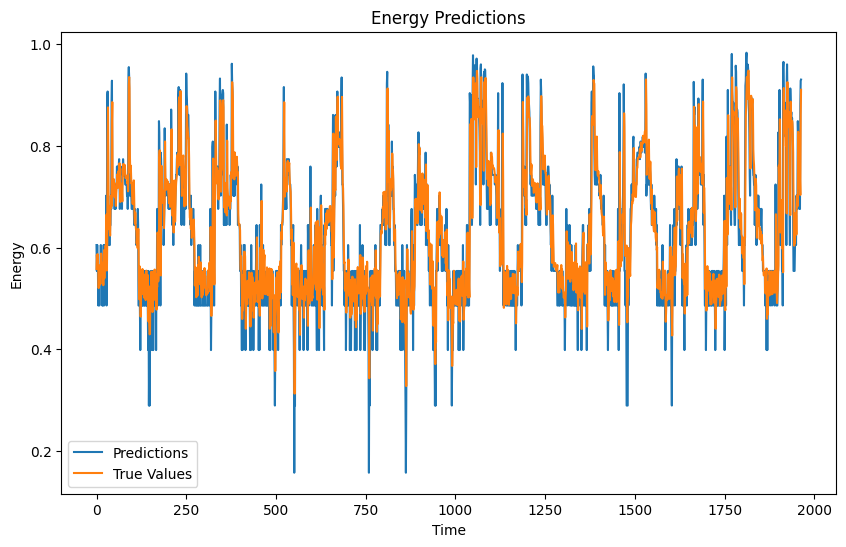

In [116]:
plot_results(y_test, test_predictions)

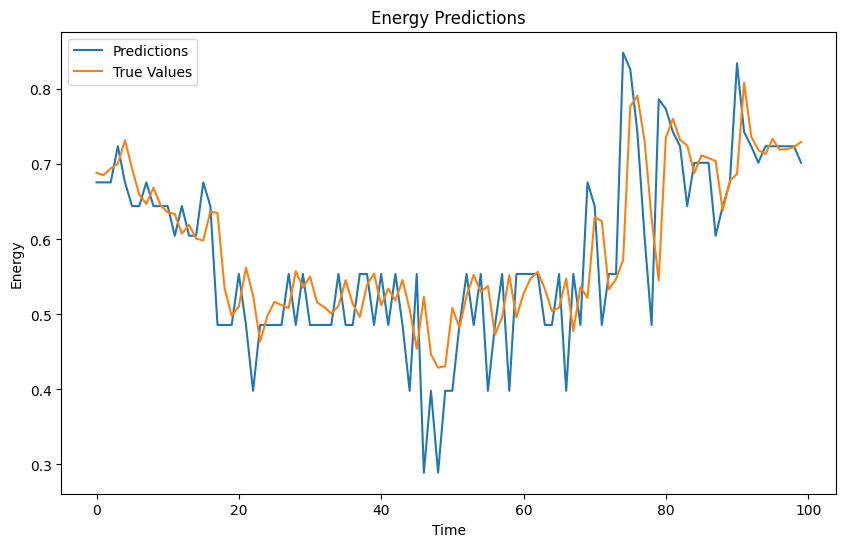

In [117]:
plot_results(y_test[100:200], test_predictions[100:200])

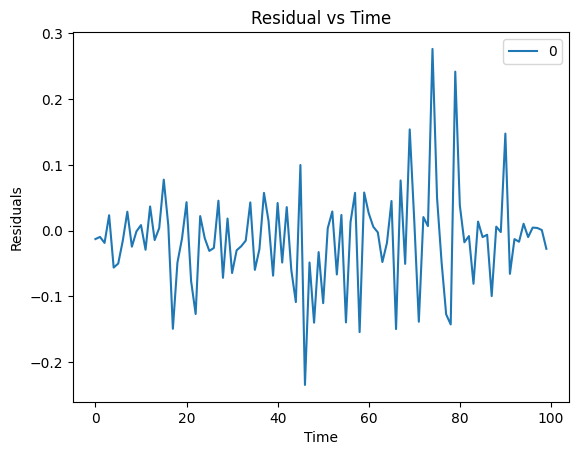

In [118]:
res_test = y_test[100:200]
res_pred = test_predictions[100:200]
residuals = [res_test[i]-res_pred[i] for i in range(len(res_test))]
residuals = pd.DataFrame(residuals)

# plot residuals
residuals.plot()
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual vs Time')
plt.show()

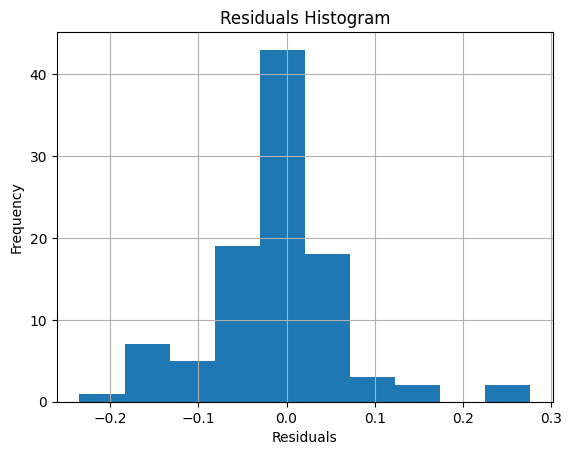

In [119]:
residuals = [res_test[i]-res_pred[i] for i in range(len(res_pred))]
residuals = pd.DataFrame(residuals)
# histogram plot
residuals.hist()
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram')
plt.show()

### Inference of Final LSTM model

- The energy prediction plot for the test set shows that the `LSTM model` is able to successfully predict the trends of the time-series data. The residual graph for our `CNN-LSTM` model is `normally distributed` around `0`, suggesting that the model is `effective in capturing temporal patterns in the data`, with `consistent variance` and `independent errors`. Indicating reliability of the model's predictions.

In [120]:
r2_increase = ((r2 - base_r2)/base_r2)*100
mse_decrease = ((base_mse - mse)/base_mse)*100
mae_decrease = ((base_mae - mae)/base_mae)*100
rmse_decrease = ((base_rmse - rmse)/base_rmse)*100
print("Base r2: " + str(base_r2.round(5)) + " Final r2: " + str(r2.round(5)) + " r2 increase: " + str(r2_increase.round(5)) + "%")
print("Base mse: " + str(base_mse.round(5)) + " Final mse: " + str(mse.round(5)) + " mse decrease: " + str(mse_decrease.round(5)) + "%")
print("Base mae: " + str(base_mae.round(5)) + " Final mae: " + str(mae.round(5)) + " mae decrease: " + str(mae_decrease.round(5)) + "%")
print("Base rmse: " + str(base_rmse.round(5)) + " Final rmse: " + str(rmse.round(5)) + " rmse decrease: " + str(rmse_decrease.round(5)) + "%")

Base r2: 0.70134 Final r2: 0.72078 r2 increase: 2.77124%
Base mse: 0.00561 Final mse: 0.00526 mse decrease: 6.21571%
Base mae: 0.05389 Final mae: 0.05193 mae decrease: 3.64534%
Base rmse: 0.07492 Final rmse: 0.07255 rmse decrease: 3.15771%


In [121]:
test_predictions = final_model.predict(X_test)
r2 = r2_score(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
rmse = np.sqrt(mse)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


In [122]:
unscaled_features = data_copy[['TARGET_energy'] + best_features]   

In [123]:
unscaled_features

TARGET_energy         T8   day_cos
date                                                   
2016-01-11 17:00:00             90  18.203125 -0.258789
2016-01-11 17:10:00             90  18.203125 -0.216431
2016-01-11 17:20:00             80  18.203125 -0.173706
2016-01-11 17:30:00             90  18.093750 -0.130493
2016-01-11 17:40:00            100  18.093750 -0.087158
...                            ...        ...       ...
2016-05-27 17:20:00            100  24.703125 -0.173706
2016-05-27 17:30:00             90  24.703125 -0.130493
2016-05-27 17:40:00            280  24.703125 -0.087158
2016-05-27 17:50:00            430  24.656250 -0.043610
2016-05-27 18:00:00            440  24.734375 -0.000000

[19735 rows x 3 columns]

In [124]:
X,y = df_to_X_y_2(unscaled_features, best_window)


In [125]:
X_train, y_train = X[:train_num], y[:train_num]
X_val, y_val = X[train_num:val_num], y[train_num:val_num]
X_test, y_test = X[val_num:], y[val_num:]

### Comparing Final unscaled LSTM model results with paper 2 LSTM model

In [126]:
# train an unscaled model to compare results with paper
unscaled_model = Sequential()
unscaled_model.add(InputLayer((best_window, f_size)))
unscaled_model.add(Conv1D(n_filter, kernel_size=k_size))
unscaled_model.add(Flatten())
unscaled_model.add(Dense(8, 'relu'))
unscaled_model.add(Dense(1, 'linear'))
cp = ModelCheckpoint('unscaled_model/.keras', save_best_only=True)
unscaled_model.compile(optimizer=Adam(learning_rate=l_rate), loss='mean_squared_error', metrics=[RootMeanSquaredError(), MeanAbsoluteError(), R2Score()])
unscaled_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, callbacks=[cp])
test_predictions = final_model.predict(X_test).flatten()
r2 = r2_score(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
rmse = np.sqrt(mse)

Epoch 1/400
494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - loss: 16260.9414 - mean_absolute_error: 76.7846 - r2_score: -0.3908 - root_mean_squared_error: 126.3955 - val_loss: 5427.1748 - val_mean_absolute_error: 33.5303 - val_r2_score: 0.2760 - val_root_mean_squared_error: 73.6694
Epoch 2/400
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 7283.5693 - mean_absolute_error: 41.4747 - r2_score: 0.3439 - root_mean_squared_error: 85.3082 - val_loss: 4916.4487 - val_mean_absolute_error: 34.0255 - val_r2_score: 0.3442 - val_root_mean_squared_error: 70.1174
Epoch 3/400
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 7057.9297 - mean_absolute_error: 41.3107 - r2_score: 0.4050 - root_mean_squared_error: 83.9758 - val_loss: 4561.6724 - val_mean_absolute_error: 31.9600 - val_r2_score: 0.3915 - val_root_mean_squared_error: 67.5402
Epoch 4/400
494/494 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 6602.6782 - mean_absolute_error: 39.4347 - r2_score: 0.4380 - root_mean_squared_error: 81.2070 - val_lo

In [127]:
print(f'r2: {r2.round(5)}, mse: {mse.round(5)}, mae: {mae.round(5)}, rmse: {rmse.round(5)}')

r2: 0.5128, mse: 4359.947265625, mae: 29.43791961669922, rmse: 66.02989959716797


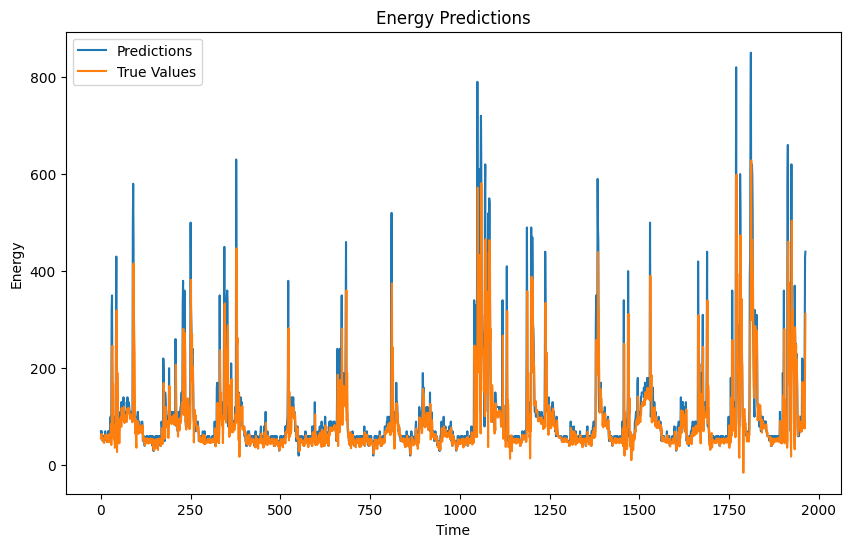

In [128]:
plot_results(y_test, test_predictions)

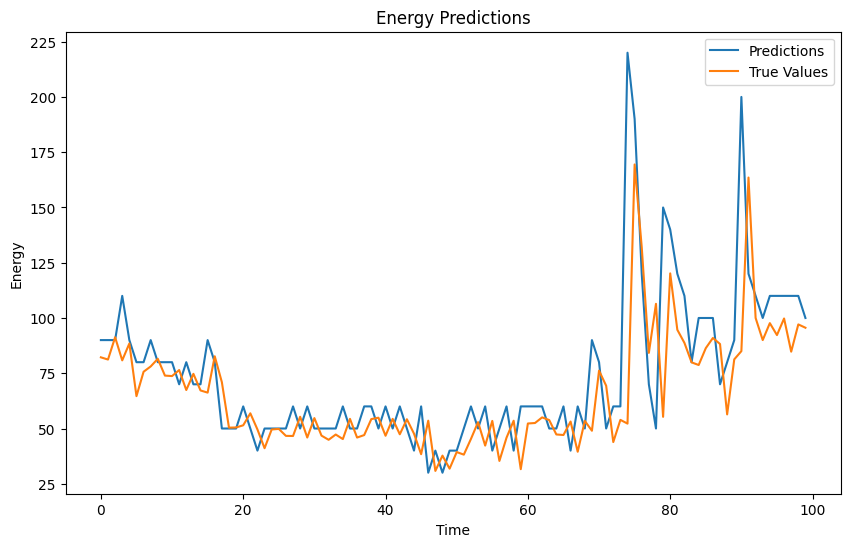

In [129]:
plot_results(y_test[100:200], test_predictions[100:200])

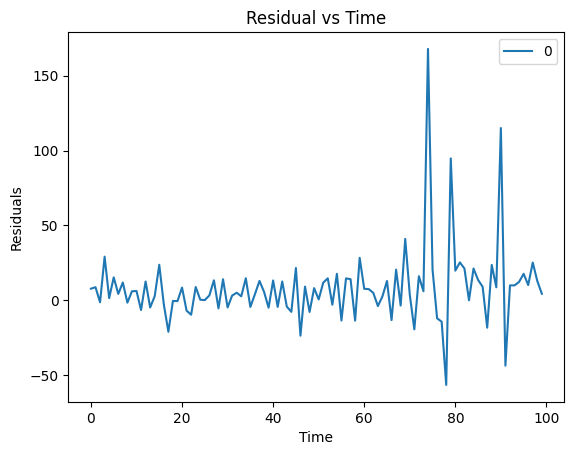

In [130]:
res_test = y_test[100:200]
res_pred = test_predictions[100:200]
residuals = [res_test[i]-res_pred[i] for i in range(len(res_test))]
residuals = pd.DataFrame(residuals)

# plot residuals
residuals.plot()
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual vs Time')
plt.show()

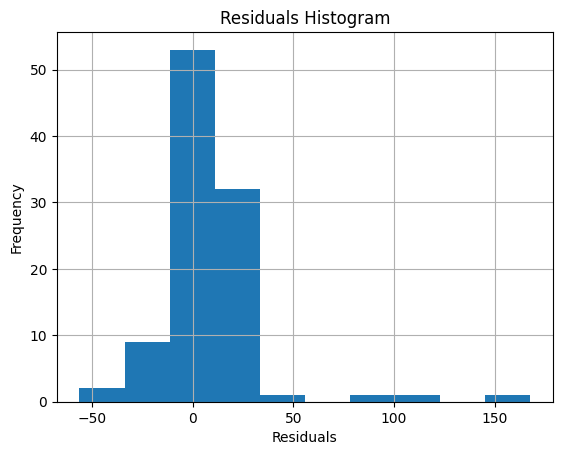

In [131]:
residuals = [res_test[i]-res_pred[i] for i in range(len(res_pred))]
residuals = pd.DataFrame(residuals)
# histogram plot
residuals.hist()
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram')
plt.show()

### Inference for Final unscaled LSTM Model vs Paper 2 LSTM Model :
- Our `CNN-LSTM` model had a `lower performance` than the `LSTM model in paper 2`. Utilising unscaled data `greatly reduced` the performance of the model. From the EDA this is likely `due to the large amount of outliers` in the `TARGET_energy`. In future to improve the performance we would train the model on `scaled data` and implement a function to inversely scale the predictions. This would likely increase the r2 and decrease RMSE significantly.
